<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/Desafio_AlgoritmoML%2BLeandro_Marin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** 🎮

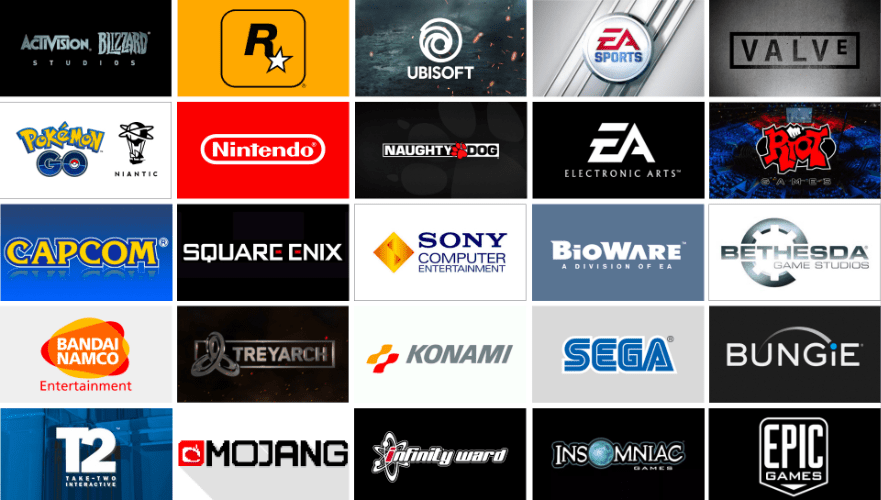




# ***Business Understading.***

## Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
## Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
## Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
## Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


# ***Data Understading.***

## ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [455]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [456]:
url='https://raw.githubusercontent.com/Noxscamp/CoderHouse/main/Datasets/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [457]:
vgsales = pd.read_csv(url)

In [458]:
df = pd.DataFrame(vgsales)
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [459]:
df.shape

(16598, 11)

### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Preparation.***

## ***EDA - Exploratory Data Analysis 📊***

### ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

####Borrado de duplicados

In [460]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


####Análisis de nulos

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

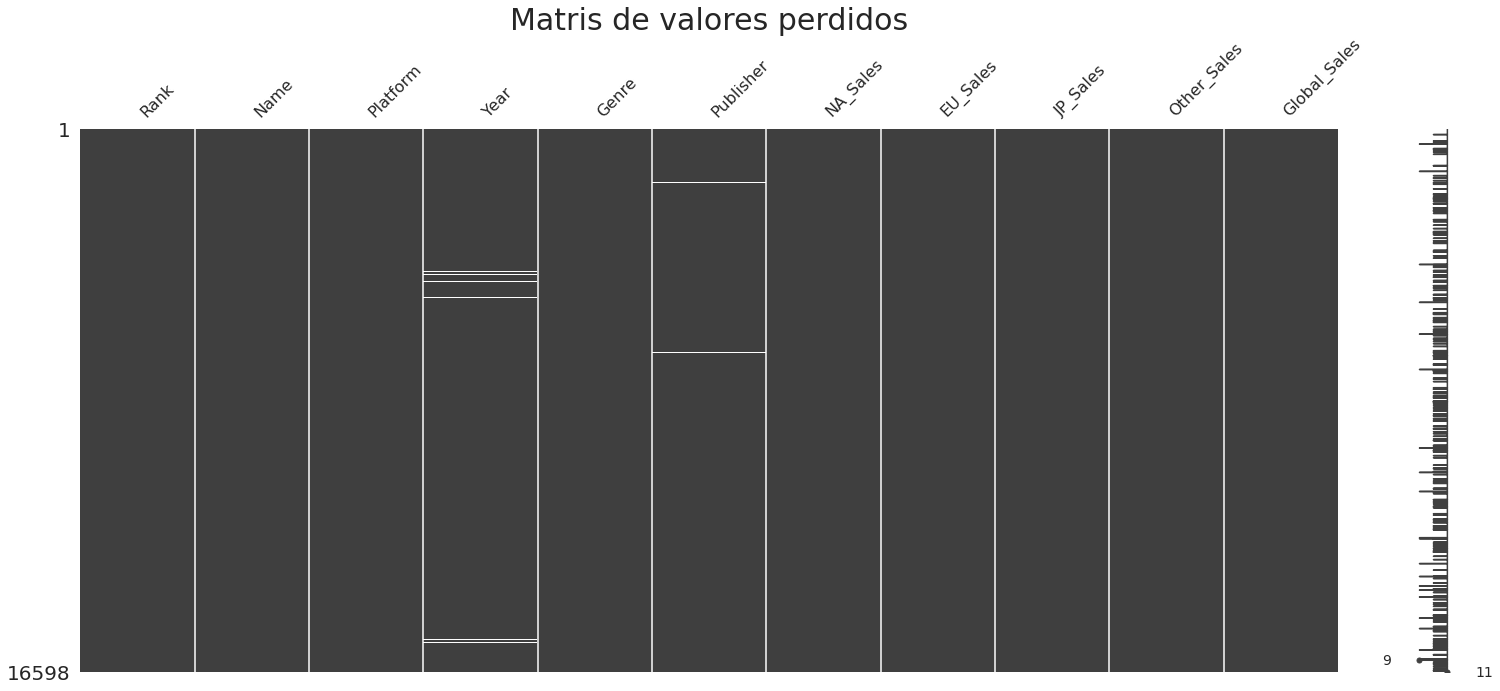

In [462]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [463]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [464]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

Columnas  Porcentaje_Missing
Year                  Year            1.632727
Publisher        Publisher            0.349440
Rank                  Rank            0.000000
Name                  Name            0.000000
Platform          Platform            0.000000
Genre                Genre            0.000000
NA_Sales          NA_Sales            0.000000
EU_Sales          EU_Sales            0.000000
JP_Sales          JP_Sales            0.000000
Other_Sales    Other_Sales            0.000000
Global_Sales  Global_Sales            0.000000

<Figure size 1080x360 with 0 Axes>

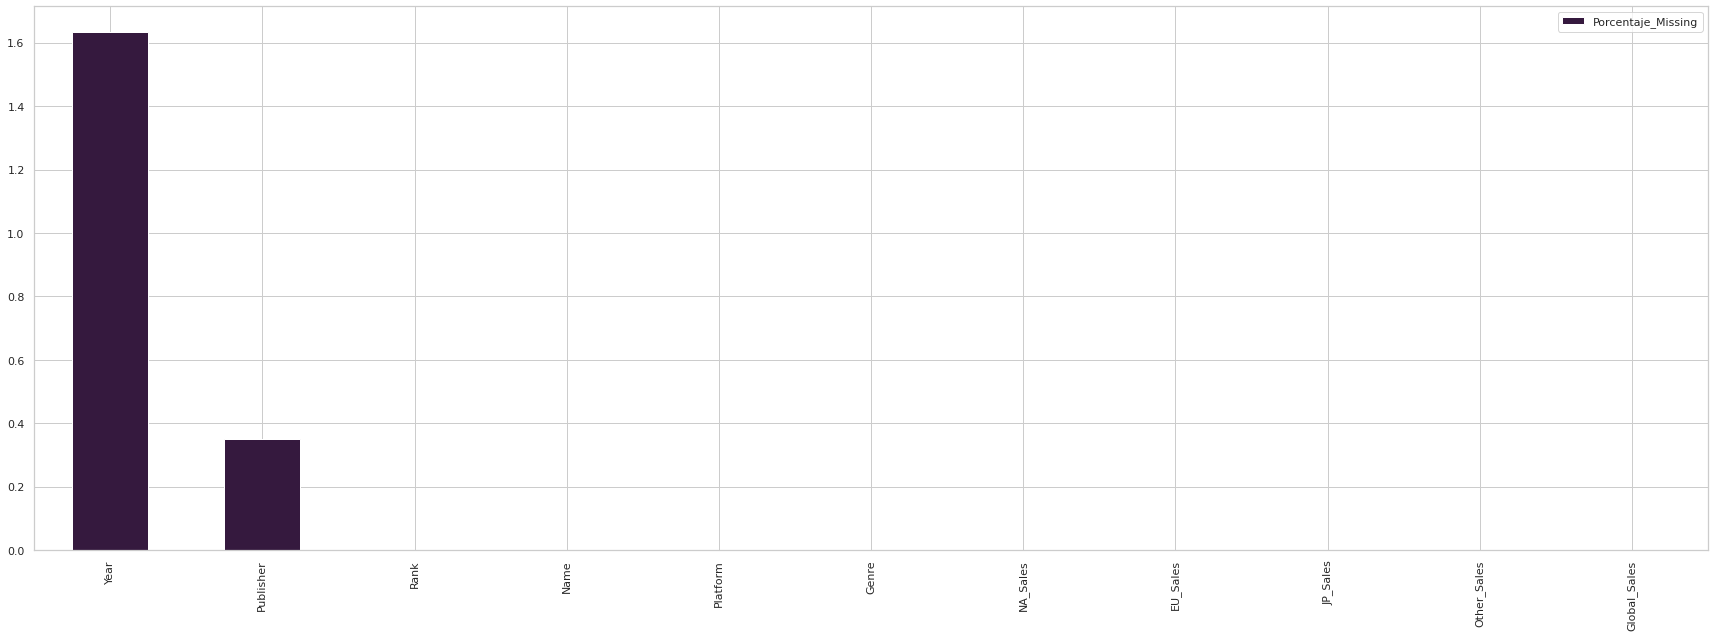

In [465]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [466]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [467]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [468]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [469]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [470]:
df = df.dropna(axis=0)

In [471]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

####Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [472]:
df["Year"] = df["Year"].astype(int)

<ipython-input-472-209e5ab67af7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####Verifico las transformaciones realizadas en el dataset

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### ***2) Distribución de datos***

Continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis.

In [474]:
df['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Text(0.5, 1.0, 'Boxplot')

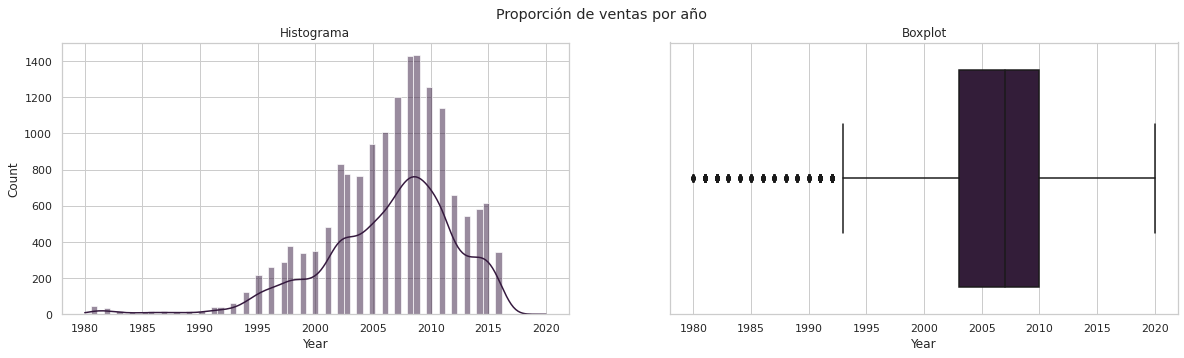

In [475]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Proporción de ventas por año')

# Histograma
sns.histplot(ax=axes[0], x = df['Year'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = df['Year'])
axes[1].set_title("Boxplot")


Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

Podemos observar también que tenemos presencia de outliers en los datos pasados, por lo que es necesario realizar un análisis para determinar si dichos datos tendrán un impacto negativo en la obtensión de insights y deberían eliminarse.

### ***3) Correlaciones y dependencias***

**A) Variables Numericas**

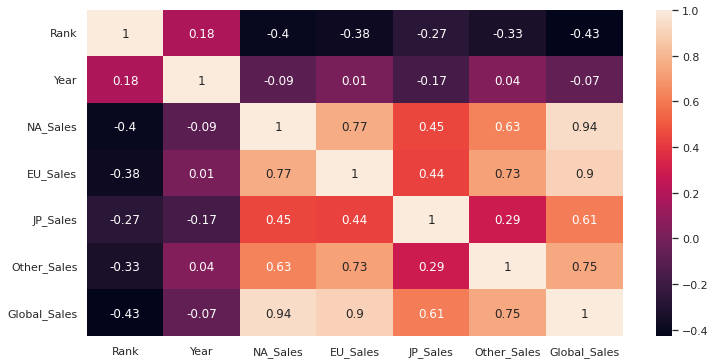

In [476]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Estados Unidos, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.94, 0.90 y 0.61 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas propias de Estados Unidos y Europa con respecto a Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones, obteniendo una correlación de 0.45 y 0.44. 

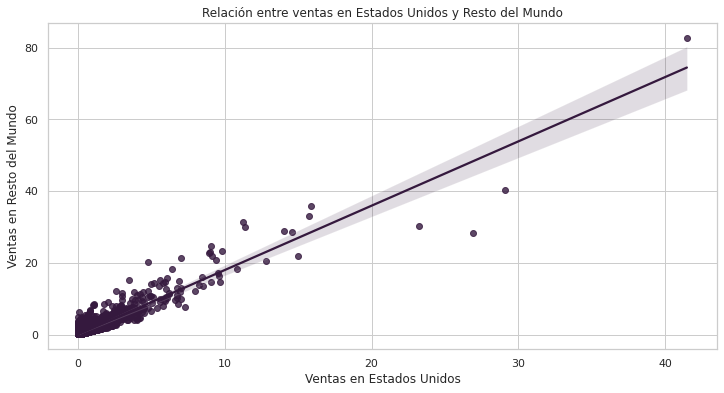

In [477]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Estados Unidos y Resto del Mundo')
plt.show()

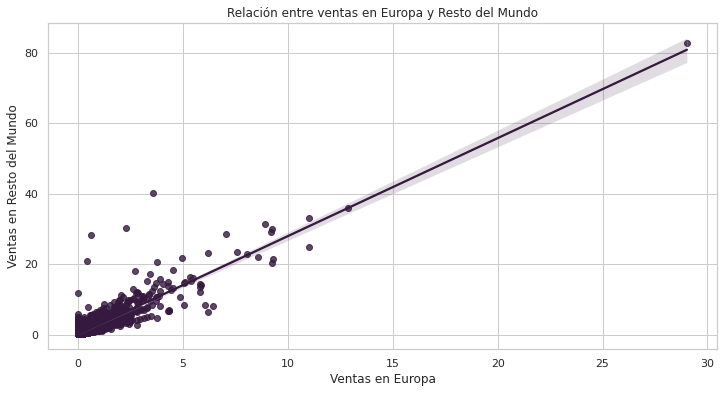

In [478]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

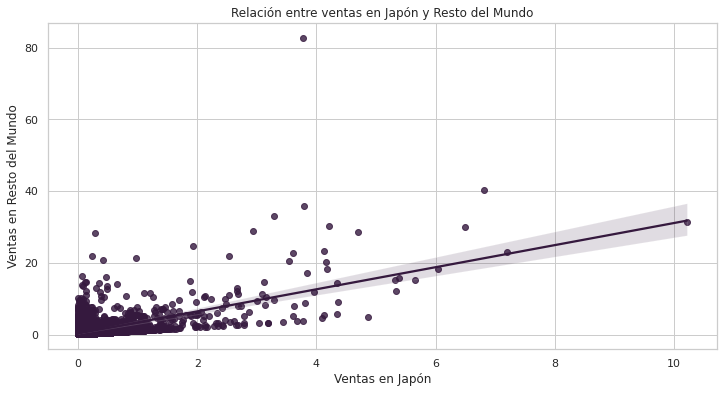

In [479]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones de mayor consumo, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

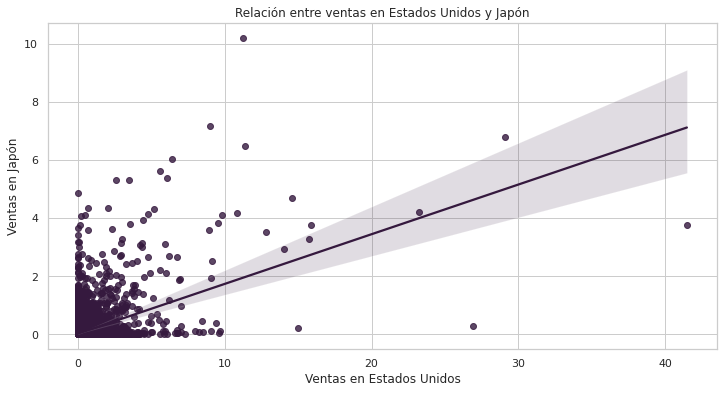

In [480]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Estados Unidos y Japón')
plt.show()

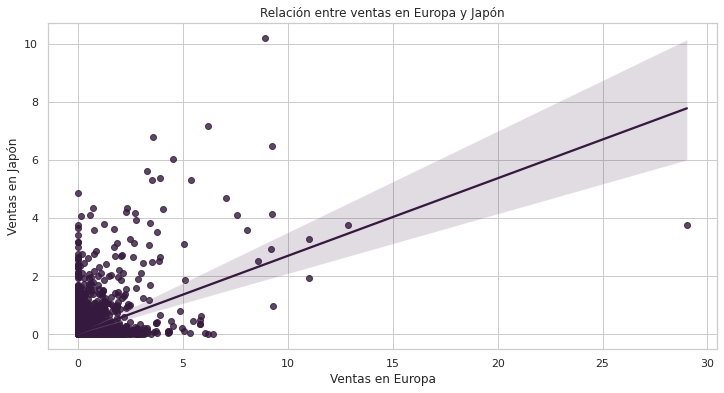

In [481]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Europa y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, y las ventas entre Europa y Japón podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Europa con respecto a Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

**B) Variables categoricas**

In [482]:
T_contingencia = pd.crosstab(df.Platform, df.Genre)
T_contingencia

Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
2600          55          1         1     5         9       8       4   
3DO            0          1         0     0         0       1       0   
3DS          180         36        14    53        28      20      10   
DC             3         11        12     0         2       0       6   
DS           336        238        36   389        90     236      66   
GB             6          5         0     8        18      15       2   
GBA          162         37        23   110       139      39      64   
GC            98         20        42    35        73      12      60   
GEN            3          2         5     1         7       0       1   
GG             0          0         0     0         1       0       0   
N64           37          4        29    18        30      12      57   
NES           13          1         4     2        28      14       4   
NG             0          0        11     0         0       0       0   
PC           161         65         5    22        11      25      57   
PCFX           0          0         0     0         0       0       0   
PS           154         67       108    76        64      32     144   
PS2          345        196       146   218       101      18     212   
PS3          373         72        76   121        36       2      90   
PS4          122         19        17    15        11       1      17   
PSP          217        213        73   104        36      44      65   
PSV          142         86        16    24        10       3      11   
SAT            3         26        31    15         5       5       8   
SCD            0          0         0     2         1       0       1   
SNES          12          4        25    17        26      13       9   
TG16           0          1         0     0         0       0       0   
WS             0          0         0     0         0       0       0   
Wii          230         83        41   272        57      54      92   
WiiU          63          3         5    21        16       4       3   
X360         318         47        65   122        24       6     102   
XB           152         26        44    45        49       7     122   
XOne          68         12         7    15         4       0      19   

Genre     Role-Playing  Shooter  Simulation  Sports  Strategy  
Platform                                                       
2600                 0       22           1      10         0  
3DO                  0        0           1       0         0  
3DS                 85        6          28      25        15  
DC                   4        3           1      10         0  
DS                 196       42         280     146        78  
GB                  21        1           5       9         7  
GBA                 73       40          18      88        18  
GC                  25       48          12     106        11  
GEN                  3        1           0       3         1  
GG                   0        0           0       0         0  
N64                  7       24          10      79         9  
NES                 11        7           0      14         0  
NG                   0        0           0       1         0  
PC                 103      145         115      49       185  
PCFX                 1        0           0       0         0  
PS                  97       96          60     221        70  
PS2                183      158          89     391        70  
PS3                117      155          30     210        22  
PS4                 47       34           5      43         5  
PSP                191       37          29     130        58  
PSV                 82        5           3      23         7  
SAT                 17       22           7      16        18  
SCD                  1        0           0       0   

In [483]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [484]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Los gráficos de correlación anteriores nos pueden dar una idea de que existe una gran similitud en cuanto a ventas en el mercado Americano y el Europeo, sin embargo, el mercado Japones presenta poca relación con respecto a los anteriores, tal como se mencionó, posiblente por la diferencia cultural lo que conlleva a un consumo de plataformas y géneros distintos que Estados Unidos y Europa.

También notamos en el gráfico del Coeficiente de Phi una buena correlación entre las ventas de plataformas y el paso de los años, seguramente por el avance de las mismas y el consumo masivo que fueron teniendo. Con respecto al género de los juegos no se visualiza una gran correlación con otras características del dataset.

### ***4) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

####Análisis descriptivo e inferencial univariado

####Feature: "Platform"

Proporción de plataformas vendidas:

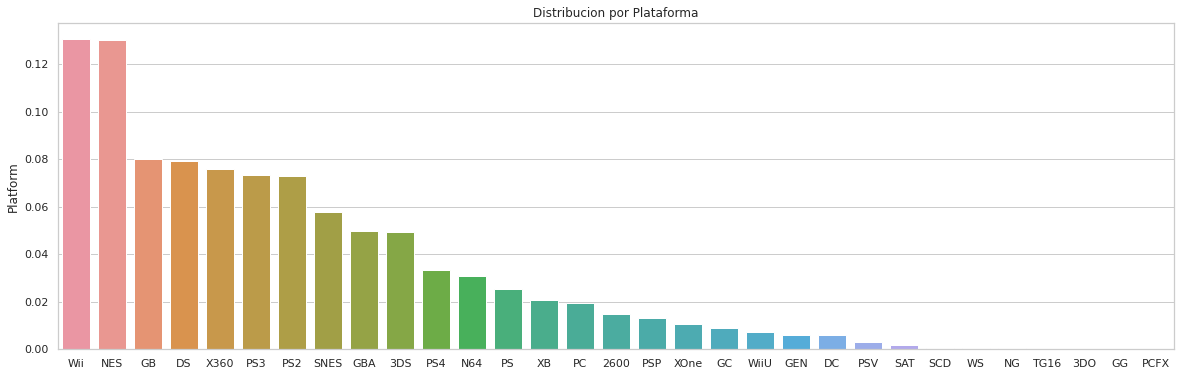

In [485]:
plt.figure(figsize=(20, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar que las plataformas con un porcentaje considerable de ventas a lo largo de la historia fueron aquellas desarrolladas por Nintendo, como la  Nintendo Wii, la Nintendo NES, la GameBoy, la Nintendo DS, seguidas por la XBox 360 desarrollada por Microsoft y las conocidas Playstation 3 y 2 desarrolladas por Sony. 

Podemos notar que la Playstation 4  y la XBox One no presentan un gran porcentaje de ventas comparado con sus antecesores, sin embargo, en llamativo como la Nintendo NES se ha mantenido como un éxito de ventas desde su salida en 1985.

Nintendo NES:

![nintendo](https://media.istockphoto.com/id/458077055/es/foto/nintendo-sistema-de-entretenimiento-con-controlador-y-juego.jpg?s=612x612&w=0&k=20&c=AbKDu6BeiMiWYJPh6sP66aI1ywDQb_k0K9iDh45nNpk=)


####Feature: "Genre"

Proporción de géneros vendidos:

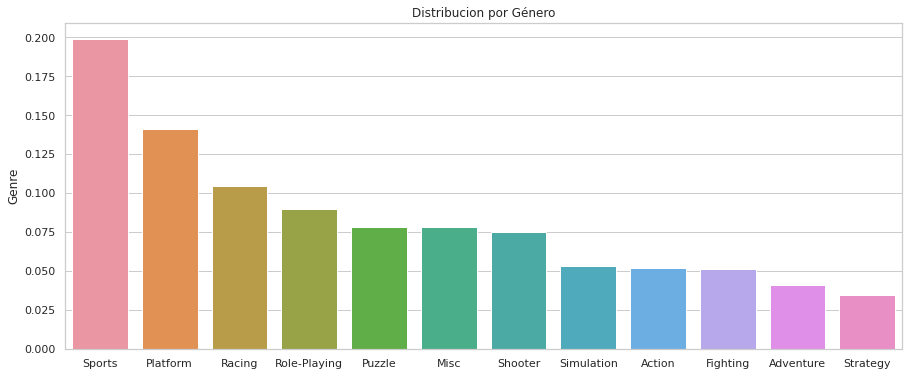

In [486]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

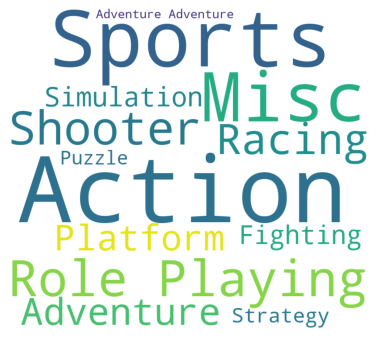

In [487]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Por un lado se puede observar que el género más consumido es el de Deportes alcanzando casi el 20% del mercado, mientras lo siguen los juegos de Plataformas, Carreras y Role-Playing, y en menor medida Puzzle, Shooter, Acción, seguidos para nuestra sorpresa por Sports, Strategy, Adventure, Acción y Estrategia.

Cabe destacar la WordCloud anterior donde se puede indentificar que existe una importante cantidad de juegos de Acción ofrecida en el mercado, sin embargo, apenas logra abarcar el 5% de las ventas.

####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

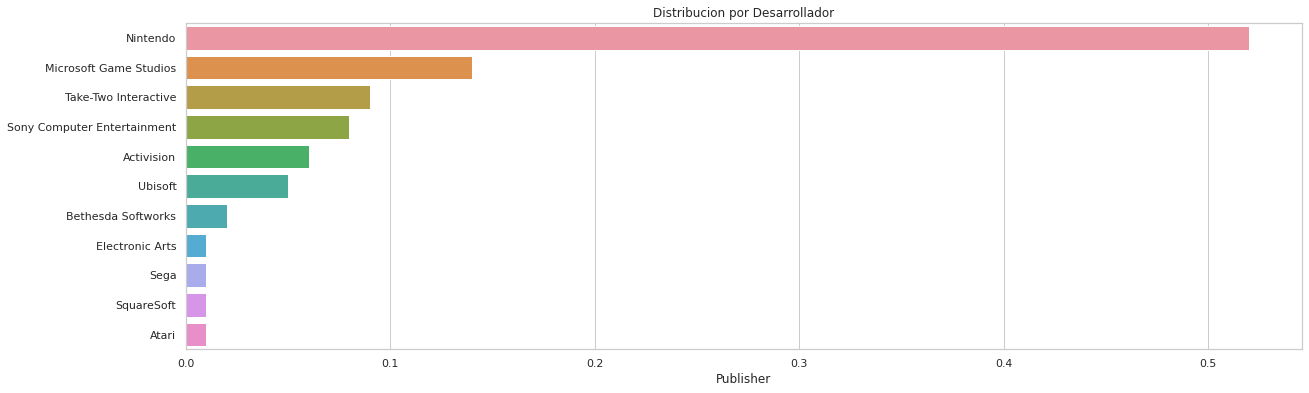

In [488]:
plt.figure(figsize=(20, 6))
x=df.head(100)["Publisher"].unique()
y=df.head(100)["Publisher"].value_counts()/df.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 50% del mercado, seguido de Microsoft Game Studios con el 15% de las ventas, y en menor porcentaje los nuevos desarrolladores de juegos como Activision, Ubisoft y Electronic Arts.

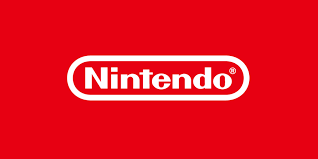







####Evolución de las plataformas en el tiempo

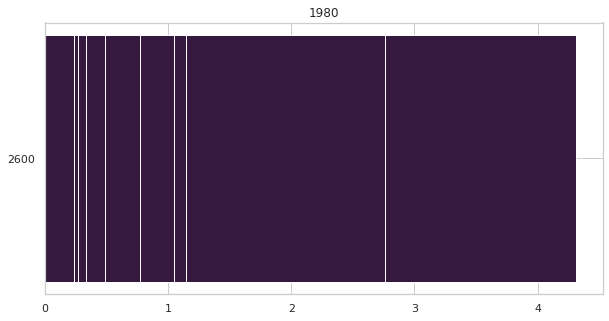

In [489]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [490]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

####Análisis descriptivo e inferencial bivariado

####RECORD DE VENTAS POR REGIÓN:

#####ESTADOS UNIDOS:

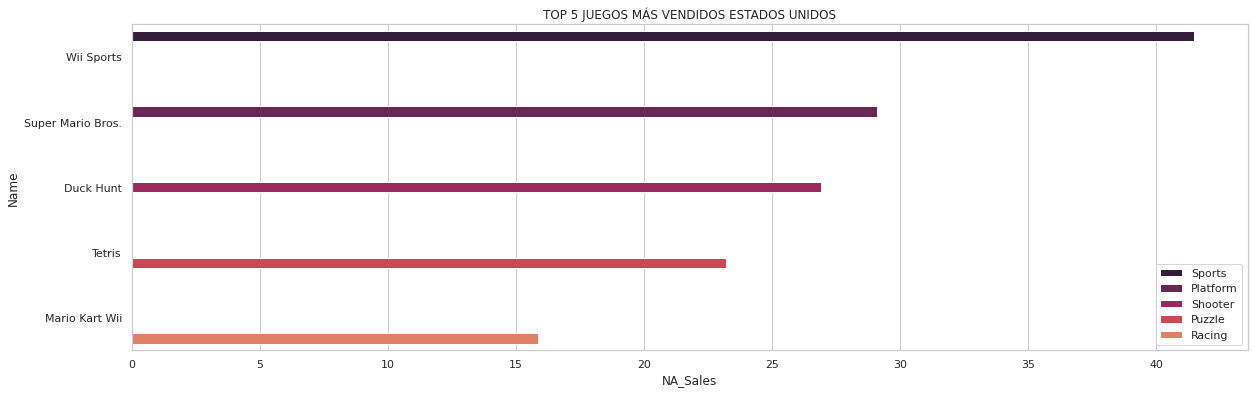

In [491]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

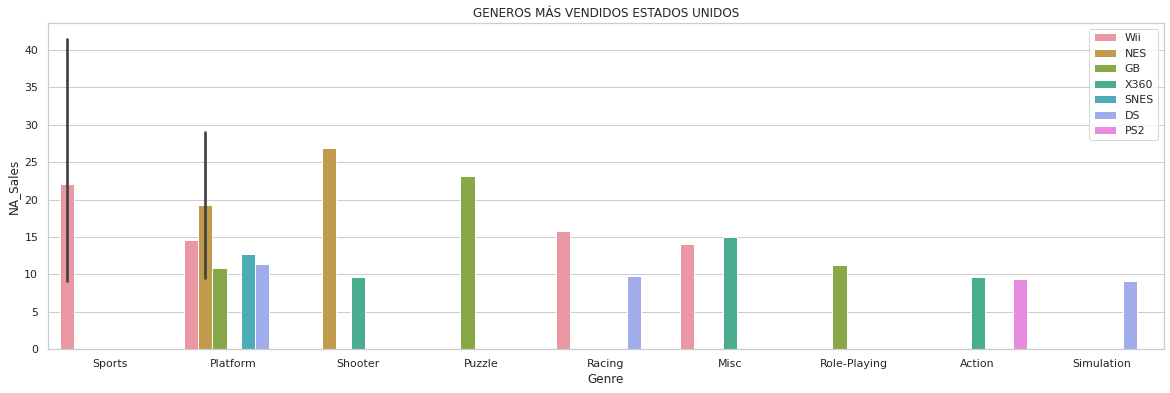

In [492]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

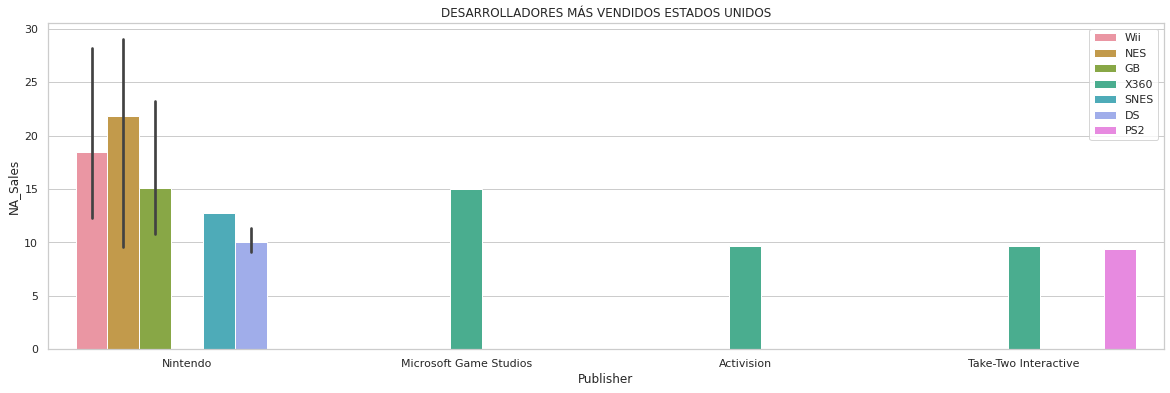

In [493]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

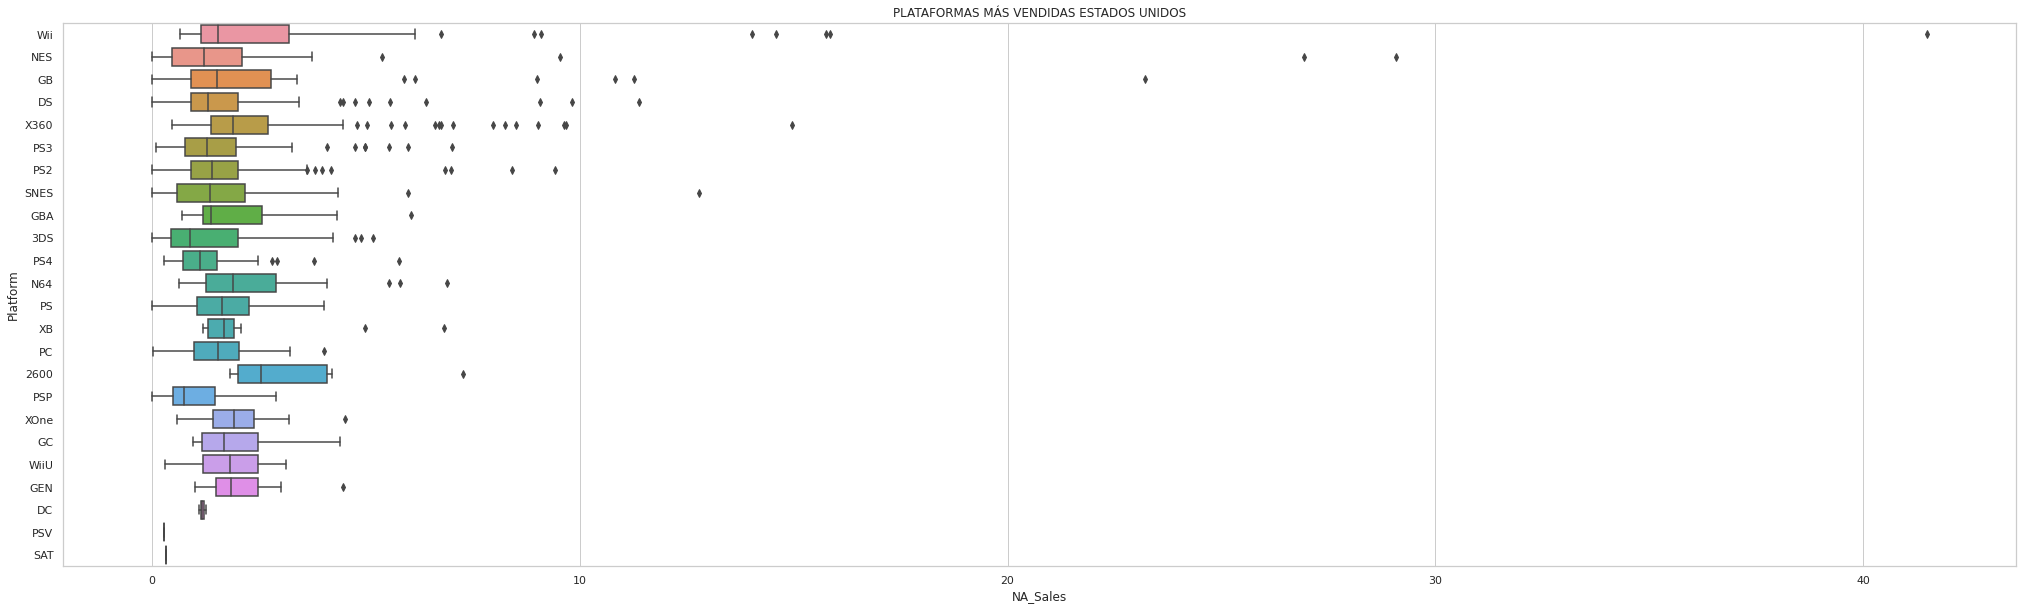

In [494]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

#####JAPÓN:

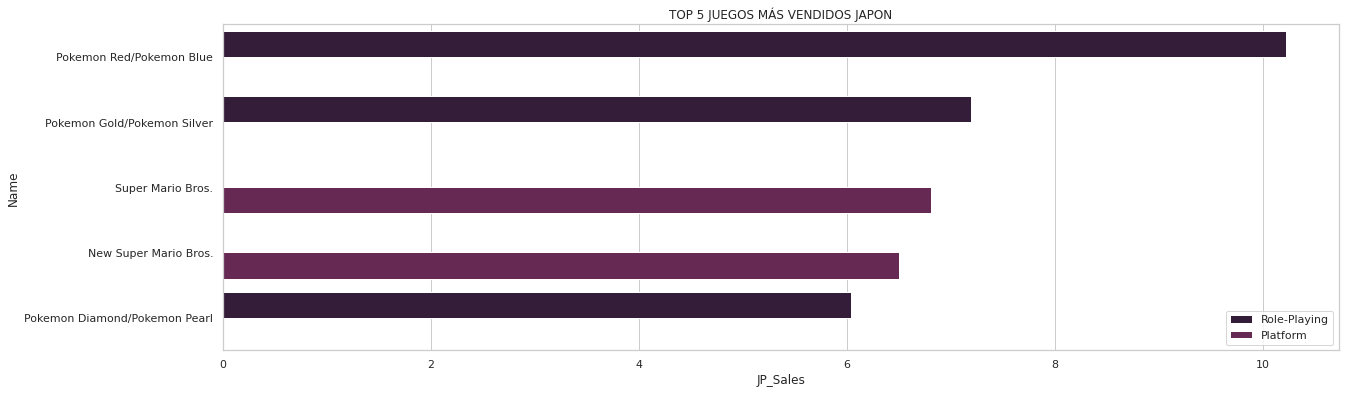

In [495]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

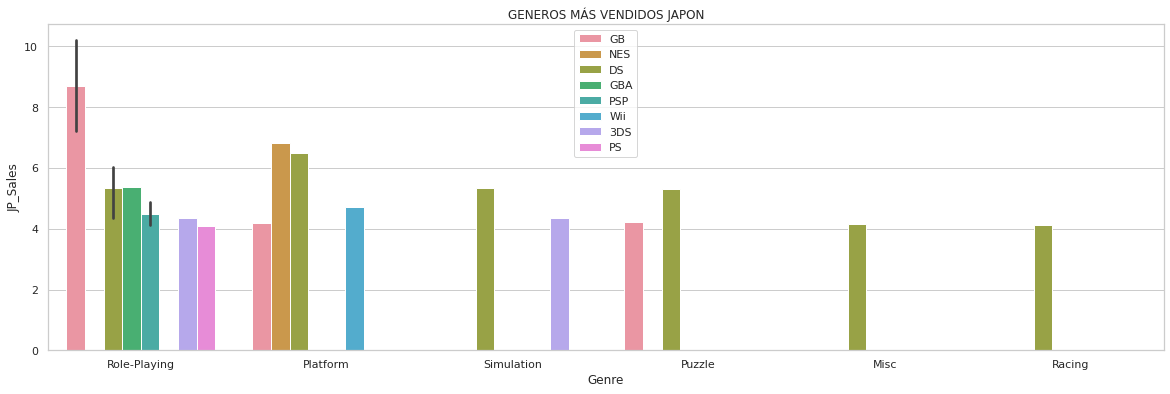

In [496]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

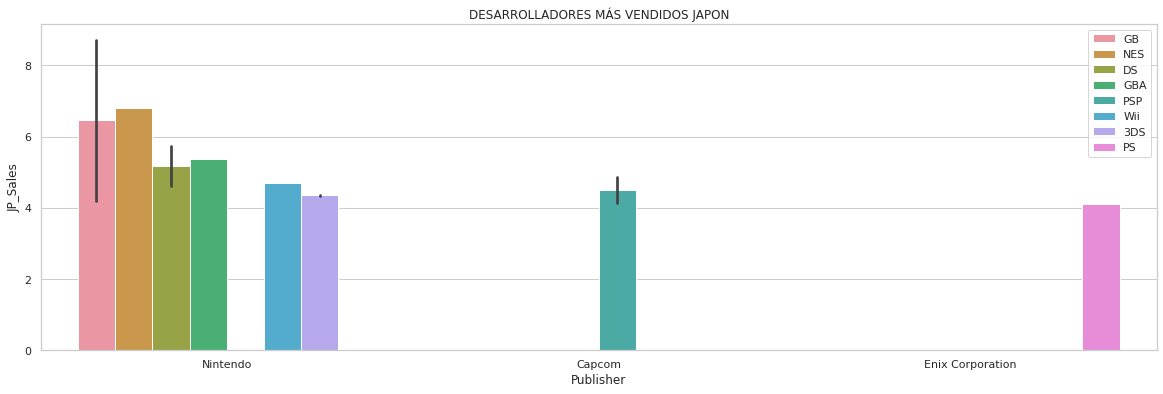

In [497]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

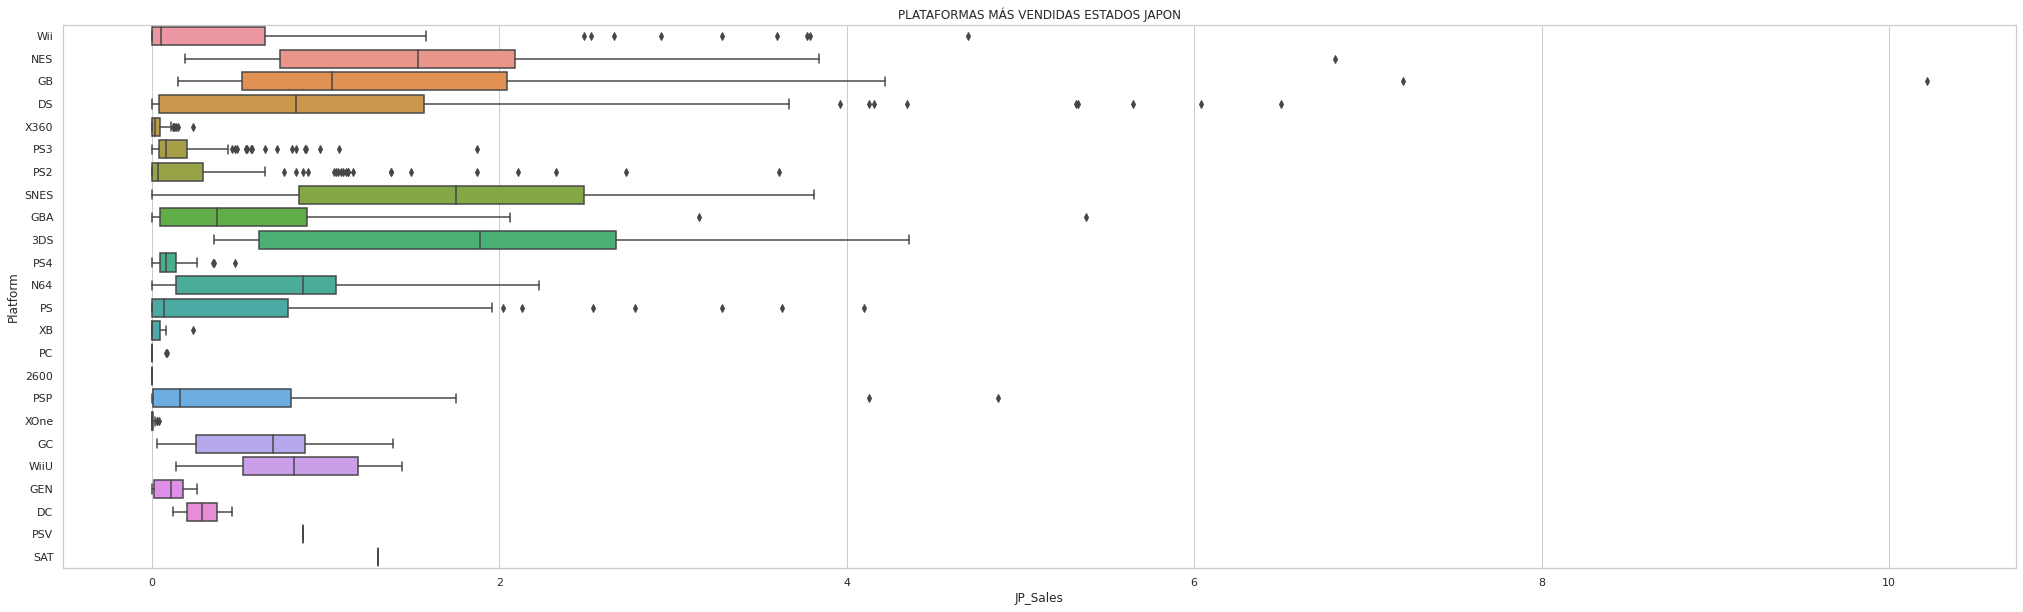

In [498]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

#####EUROPA:

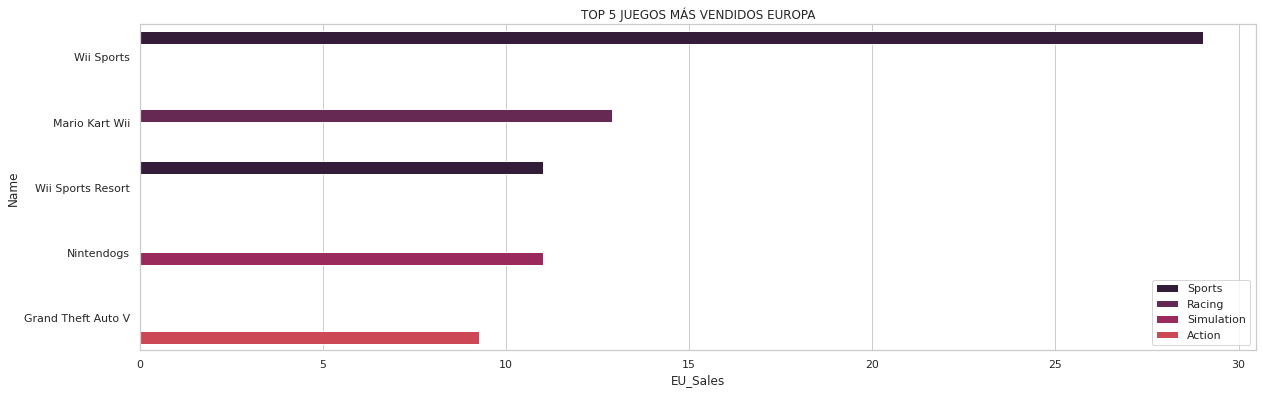

In [499]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

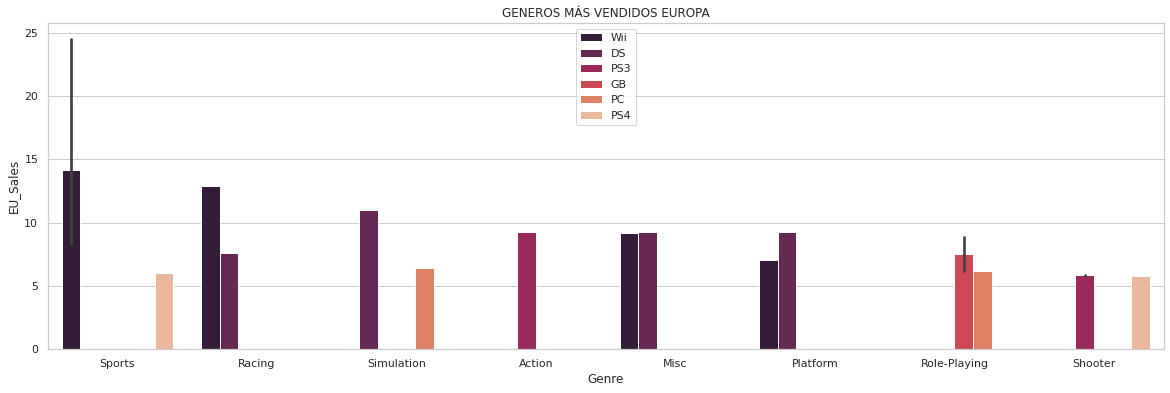

In [500]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

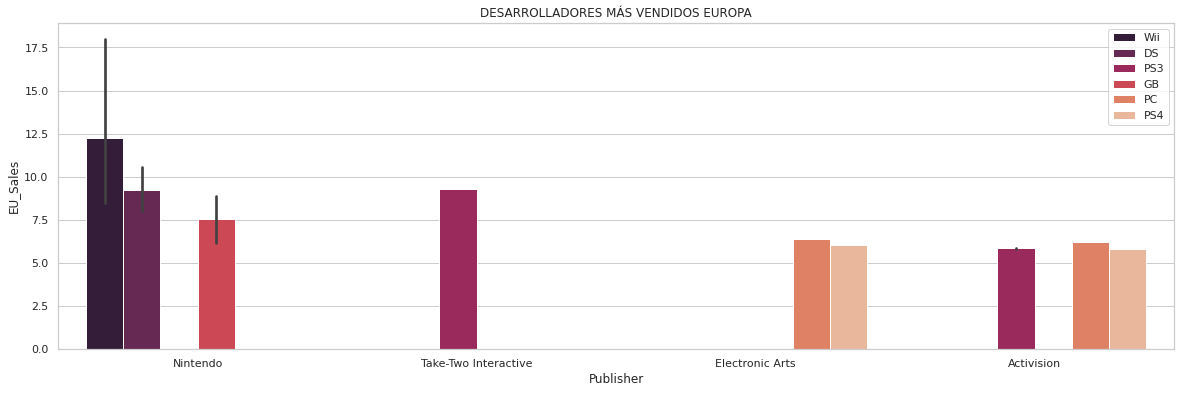

In [501]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

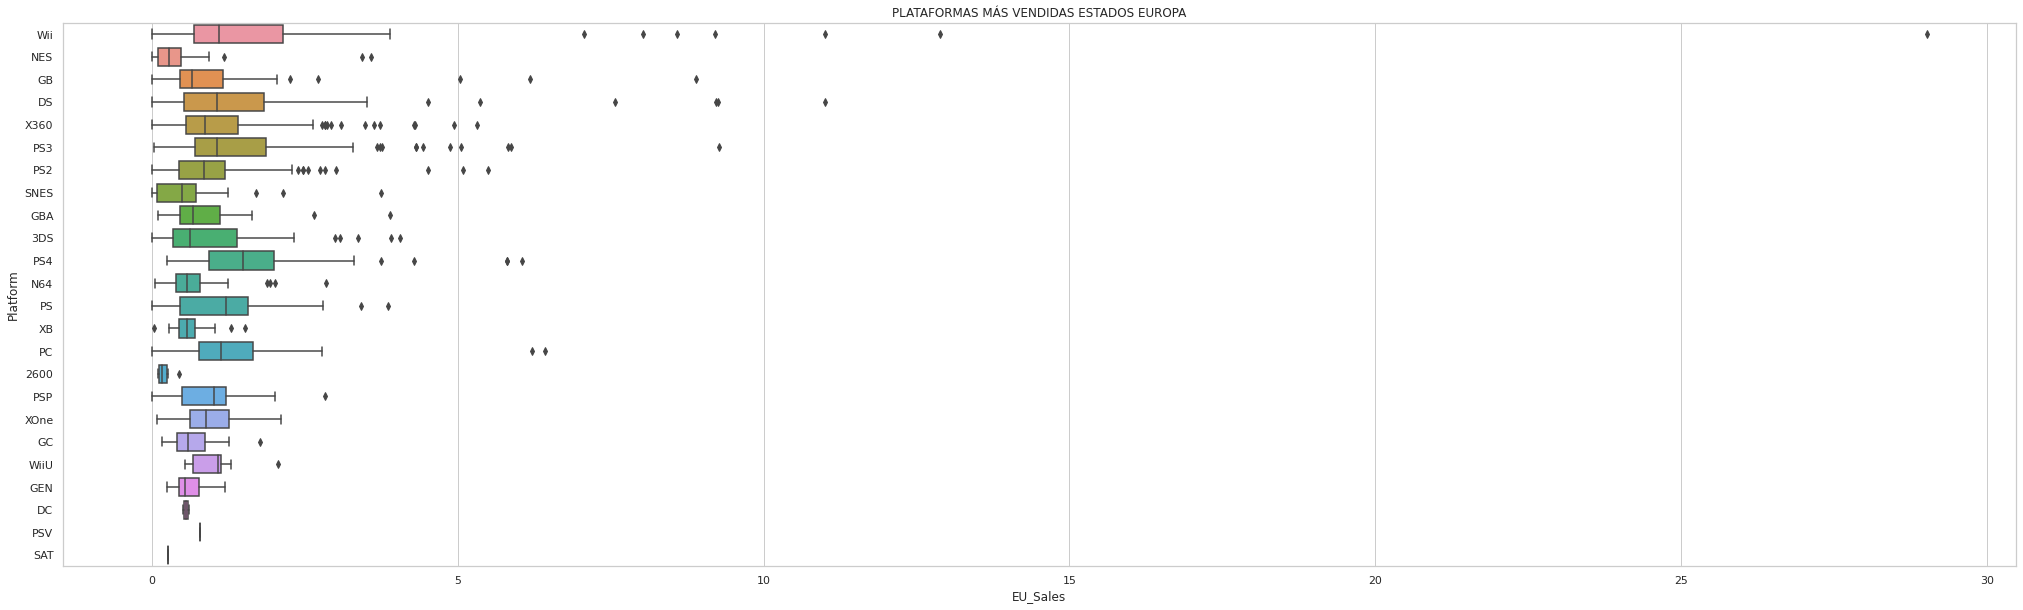

In [502]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con casi 30 millones en ventas.

También podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya habíamos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con géneros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Japón, liderando las ventas los juegos de Deportes, Carreras, Simulación y Acción, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Japón, los europeos consumen una mayor diversidad de géneros y plataformas, teniendo preferencia por géneros que tengan cierto vínculo con la realidad como Deportes, Carreras y Simulación. 

####Análisis descriptivo e inferencial multivariado

####CANTIDAD DE JUEGOS POR PLATAFORMA:

In [503]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [504]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table1 = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table1.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       80.78
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.03
3       DC  NA_Sales        5.43
4       DS  NA_Sales      388.56

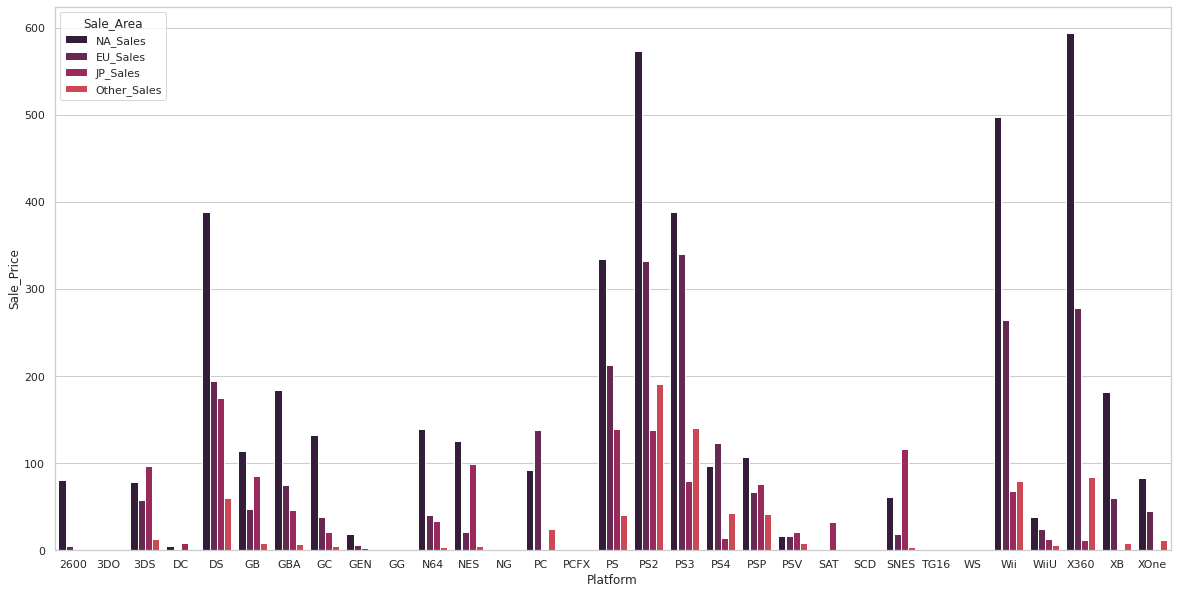

In [505]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table1)
plt.show()

Podemos observar como la PS2 y la DS son las plataformas que más juegos tienen en el mercado, esto se puede deber a la antigüedad en el mercado de las consolas. Lo que nos lleva automáticamente a pensar que son consolas fuertes en sus ventas debido a la gran oferta de juegos que tienen disponibles.

Esta claro que la XBox360, la Nintendo Wii, las Playstation 1, 2 y 3 y la Nintendo DS son los líderes del mercado, con Estados Unidos como el máximo consumidor de estas plataformas.

Ninguna de ellas es la consola de última generación, lo que se puede deber a dos principales características, el tiempo que las consolas tienen en el mercado es superior a las consolas de última generación como la PS4 y la accesibilidad económica es superior a estas también.


####VENTAS DE JUEGOS POR GÉNERO A NIVEL MUNDIAL:


In [506]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0        Sports     41.49     29.02      3.77         8.46
1      Platform     29.08      3.58      6.81         0.77
2        Racing     15.85     12.88      3.79         3.31
3        Sports     15.75     11.01      3.28         2.96
4  Role-Playing     11.27      8.89     10.22         1.00

In [507]:
comp_genre = comp_genre.groupby(by=['Genre']).sum().reset_index()
comp_table2 = pd.melt(comp_genre, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table2.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      861.80
1  Adventure  NA_Sales      102.06
2   Fighting  NA_Sales      220.74
3       Misc  NA_Sales      402.48
4   Platform  NA_Sales      445.99

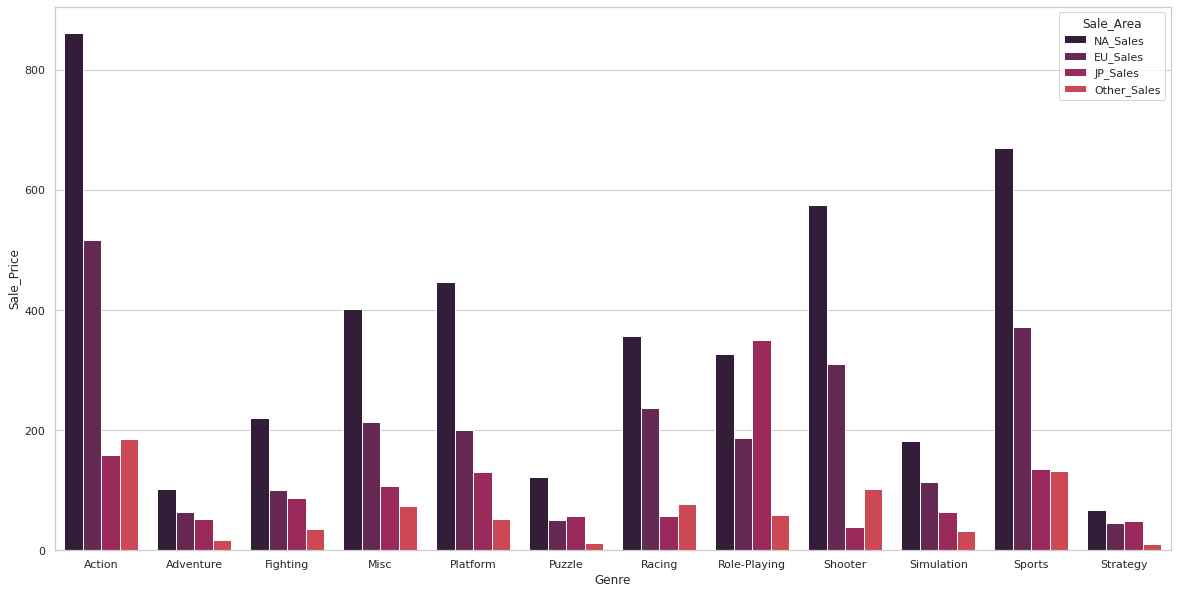

In [508]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table2)
plt.show()

A partir del gráfico podemos ver cómo los juegos RPG (o Role-Playing) son los únicos en los cuales las ventas en Japón superan a Estados Unidos. Esto habla del tamaño superior de ventas de Estados Unidos frente a los otros mercados.

En los demás géneros, se puede apreciar cierta similitud en consumo, donde lidera Estados Unidos, esto significa que si un género fue record de ventas, lo fue tanto en Estados Unidos como en Europa. Inclusive en los géneros Acción, Shooter y Racing las ventas alrededor del mundo fueron aún mayores que en Japón.

Podemos afirmar cómo el mercado europeo es similar en gustos y características al mercado de Estados Unidos y a su vez estos son bastante diferentes a los gustos del mercado japonés.

Finalmente, es notoria la popularidad que tienen juegos de Acción, Deportes y Shooter en el mercado. Si se quisiera desarrollar un nuevo juego con posibilidad de tener un gran mercado para insertarse, sería ideal que pertenezca a alguno de los géneros antes mencionados.

## ***5) Distribución e identificación de Outliers***

Posterior al analisis generalizado del contexto de la base de datos continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis para posteriormente volver a analizar cuanto se modifico su comportamiento.

#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Estados Unidos:



Text(0, 0.5, 'Ventas en Estados Unidos')

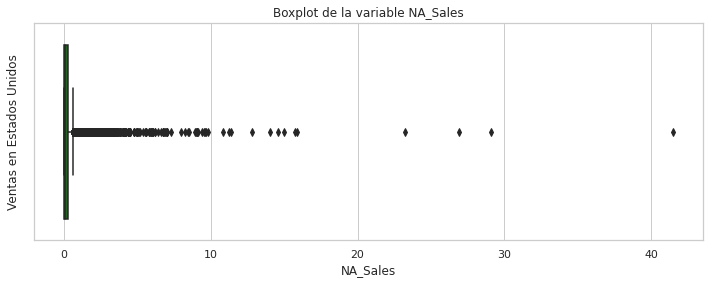

In [509]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="NA_Sales", data=df, color='green')
plt.title('Boxplot de la variable NA_Sales')
ax.set_ylabel('Ventas en Estados Unidos')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [510]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['NA_Sales'], 30)
p90 = np.percentile(df['NA_Sales'], 90)

In [511]:
dfp30=df[(df['NA_Sales'] <= p30)]
dfp30['NA_Sales'].describe()

count    4965.000000
mean        0.001059
std         0.003078
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.010000
Name: NA_Sales, dtype: float64

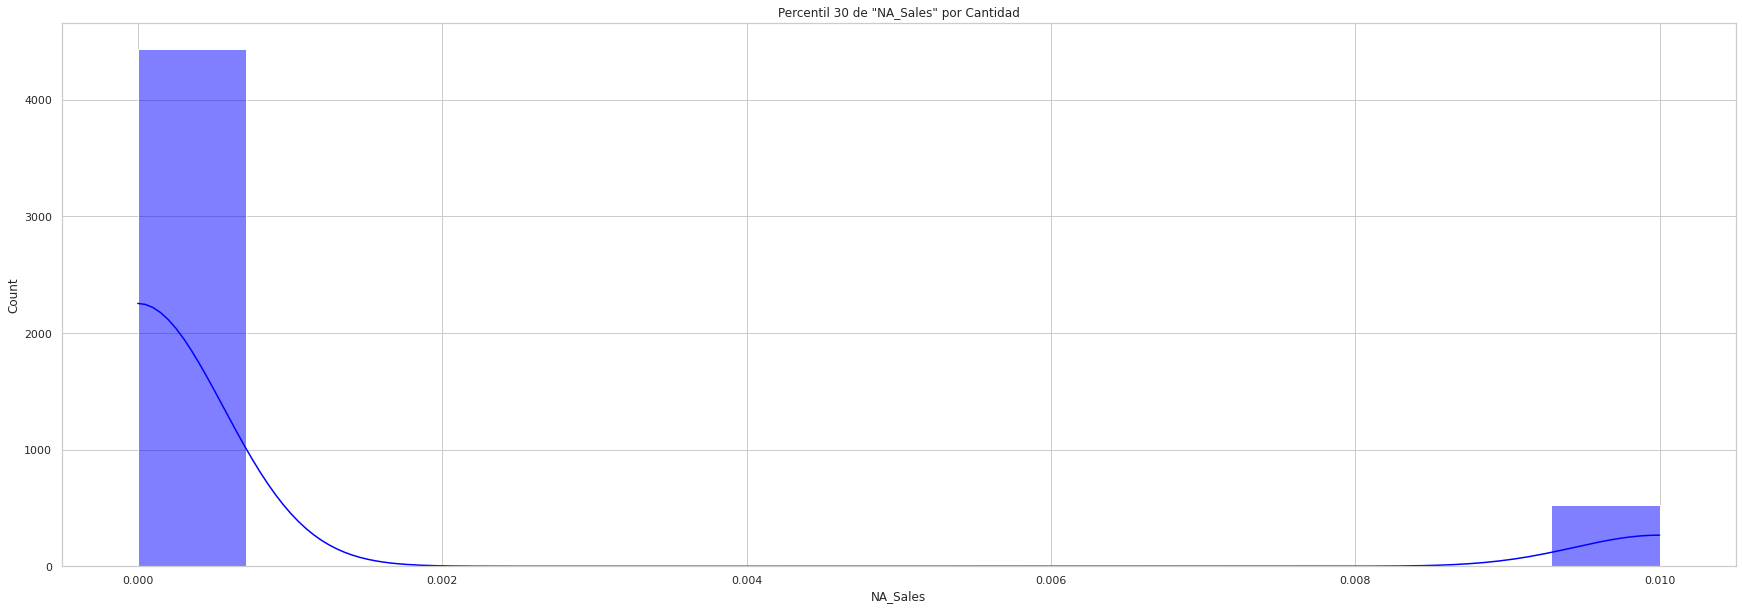

In [512]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['NA_Sales'], color='blue',kde=True).set(title='Percentil 30 de "NA_Sales" por Cantidad')
plt.show()

In [513]:
dfp90=df[(df['NA_Sales'] >= p90)]
dfp90['NA_Sales'].describe()

count    1660.000000
mean        1.620139
std         2.104160
min         0.610000
25%         0.780000
50%         1.060000
75%         1.720000
max        41.490000
Name: NA_Sales, dtype: float64

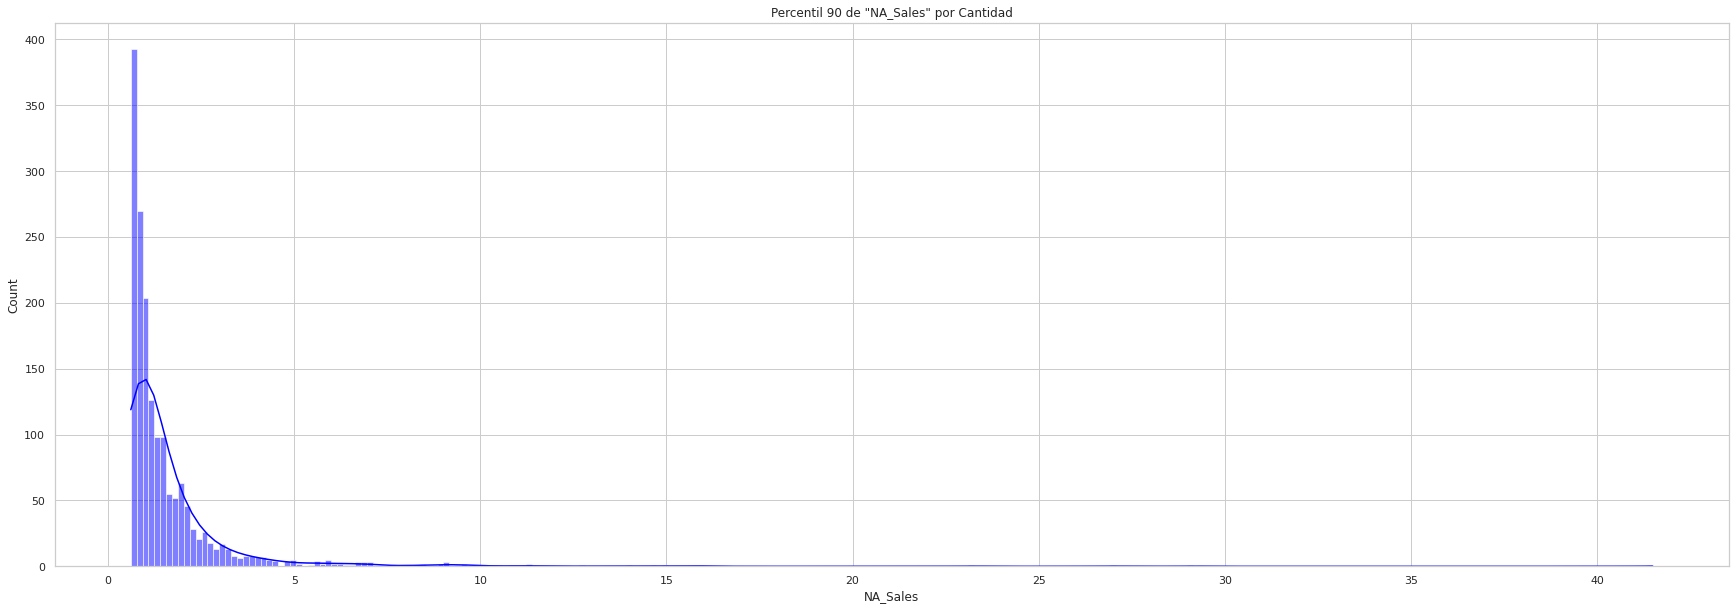

In [514]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['NA_Sales'],color='blue',kde=True).set(title='Percentil 90 de "NA_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [515]:
df = df[(df['NA_Sales'] >= p30) & (df['NA_Sales'] <= p90)]

In [516]:
df['NA_Sales'].describe()

count    10259.000000
mean         0.162093
std          0.143056
min          0.010000
25%          0.050000
50%          0.110000
75%          0.230000
max          0.610000
Name: NA_Sales, dtype: float64

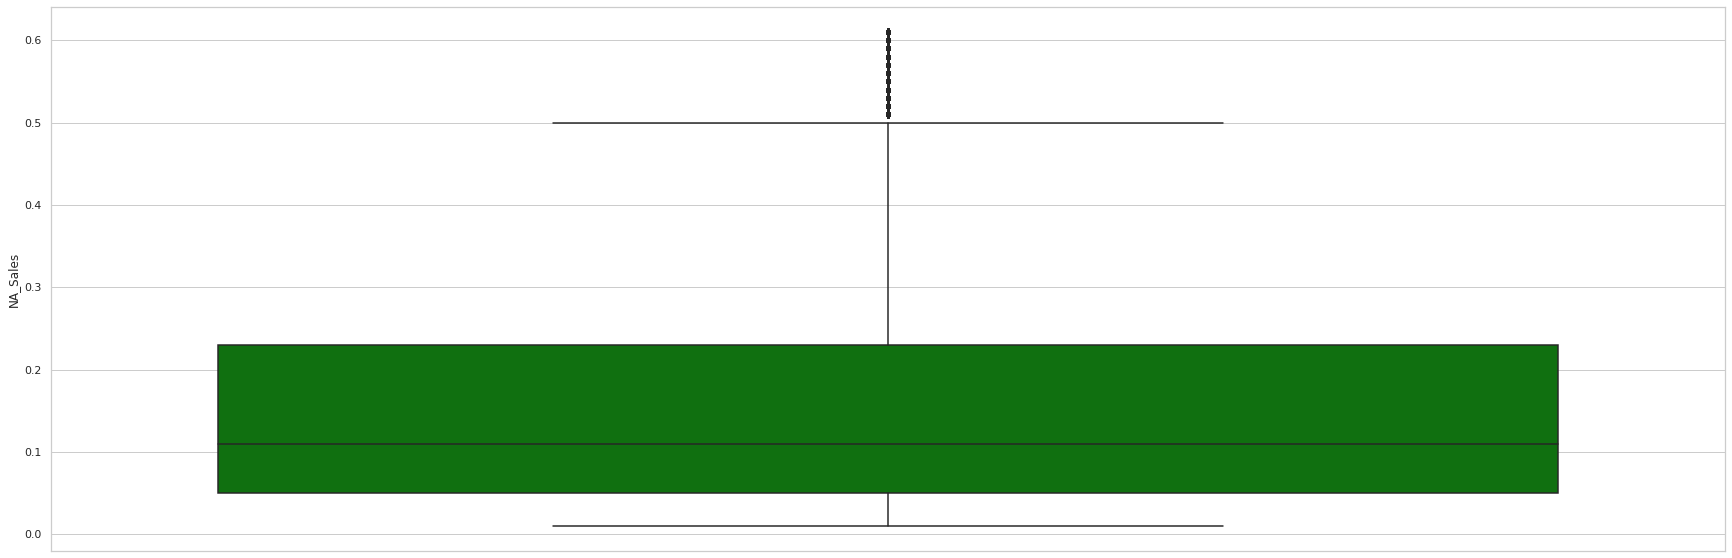

In [517]:
ax = sns.boxplot(y=df['NA_Sales'], data=df,color='green')

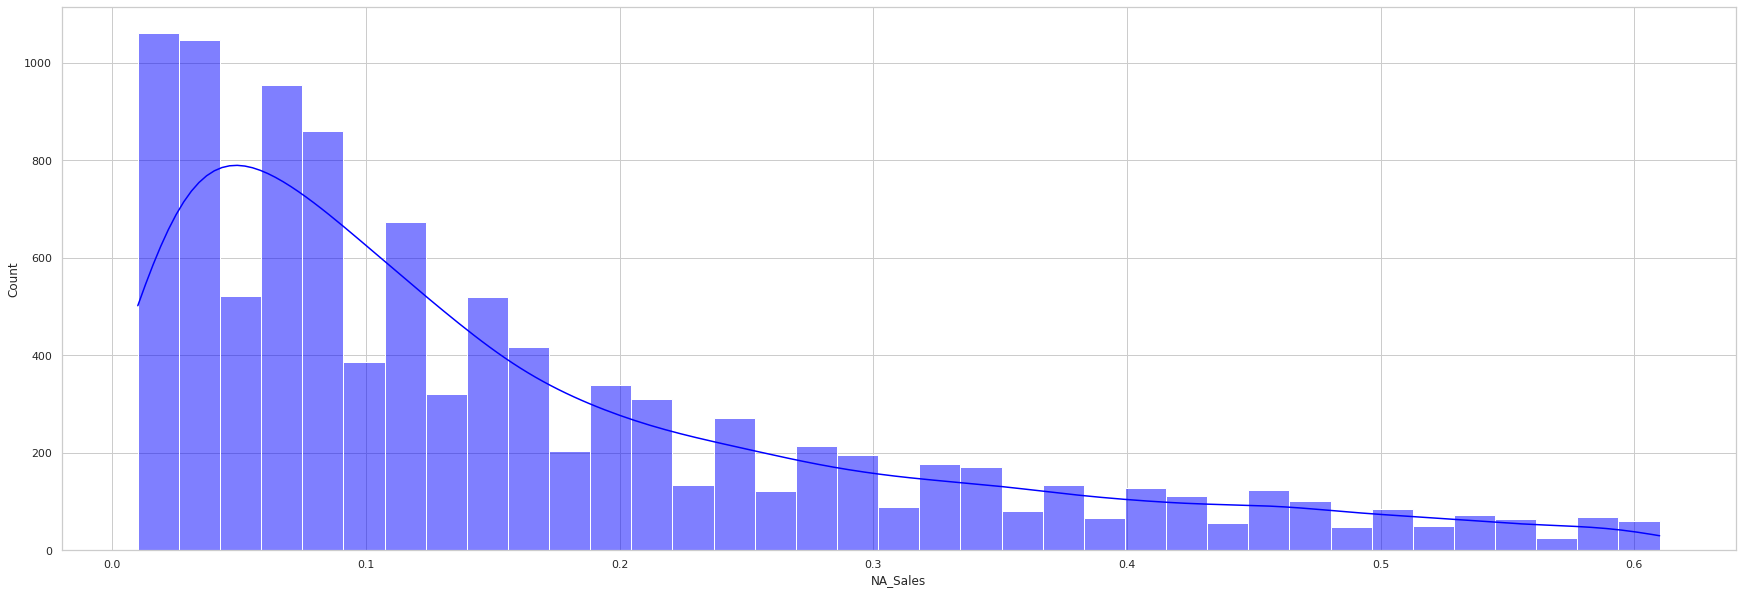

In [518]:
ax = sns.histplot(df['NA_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Europa:



Text(0, 0.5, 'Ventas en Europa')

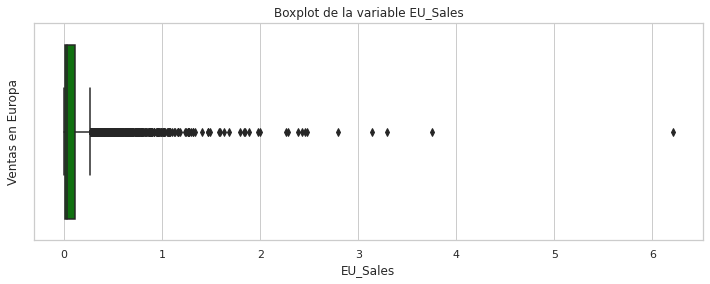

In [519]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="EU_Sales", data=df, color='green')
plt.title('Boxplot de la variable EU_Sales')
ax.set_ylabel('Ventas en Europa')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [520]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['EU_Sales'], 30)
p90 = np.percentile(df['EU_Sales'], 90)

In [521]:
dfp30=df[(df['EU_Sales'] <= p30)]
dfp30['EU_Sales'].describe()

count    3443.000000
mean        0.003517
std         0.004776
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         0.010000
Name: EU_Sales, dtype: float64

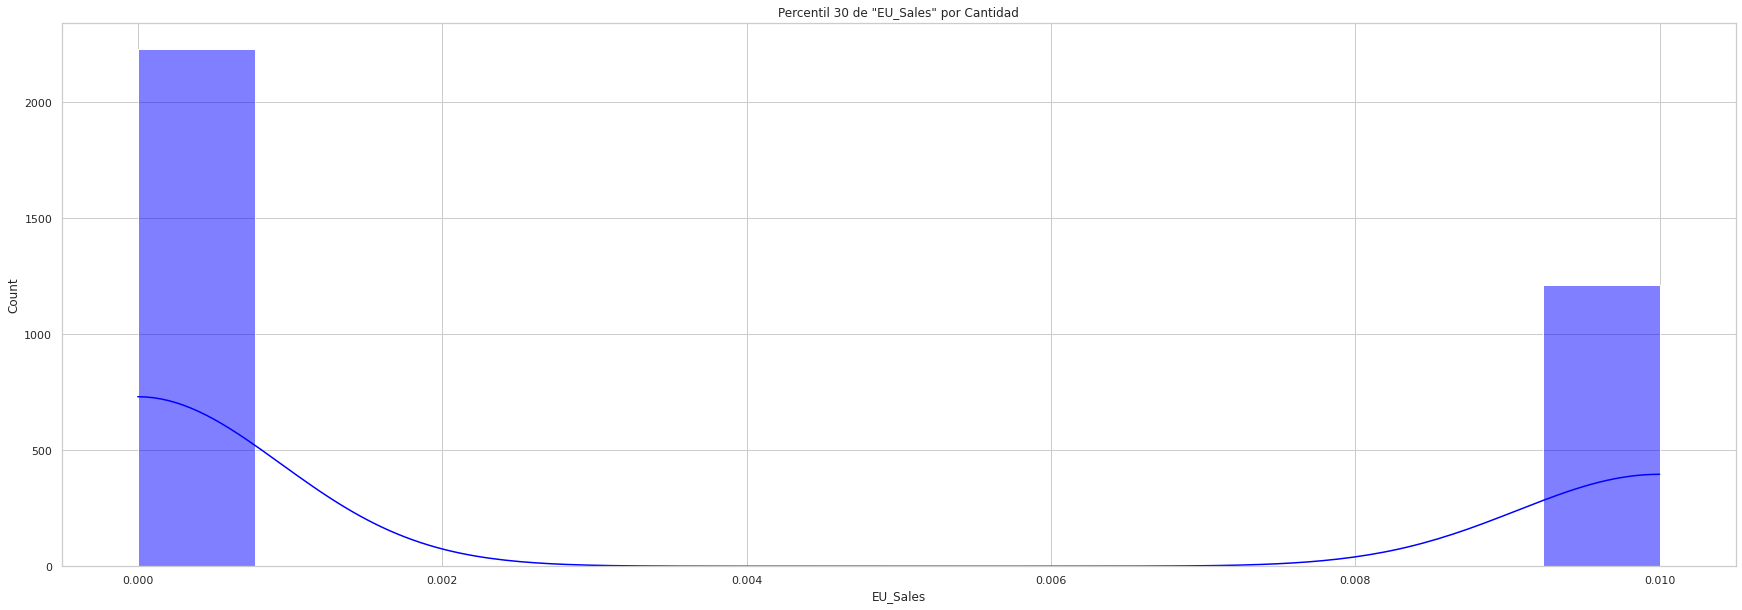

In [522]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['EU_Sales'], color='blue',kde=True).set(title='Percentil 30 de "EU_Sales" por Cantidad')
plt.show()

In [523]:
dfp90=df[(df['EU_Sales'] >= p90)]
dfp90['EU_Sales'].describe()

count    1037.000000
mean        0.481986
std         0.383468
min         0.250000
25%         0.300000
50%         0.370000
75%         0.510000
max         6.210000
Name: EU_Sales, dtype: float64

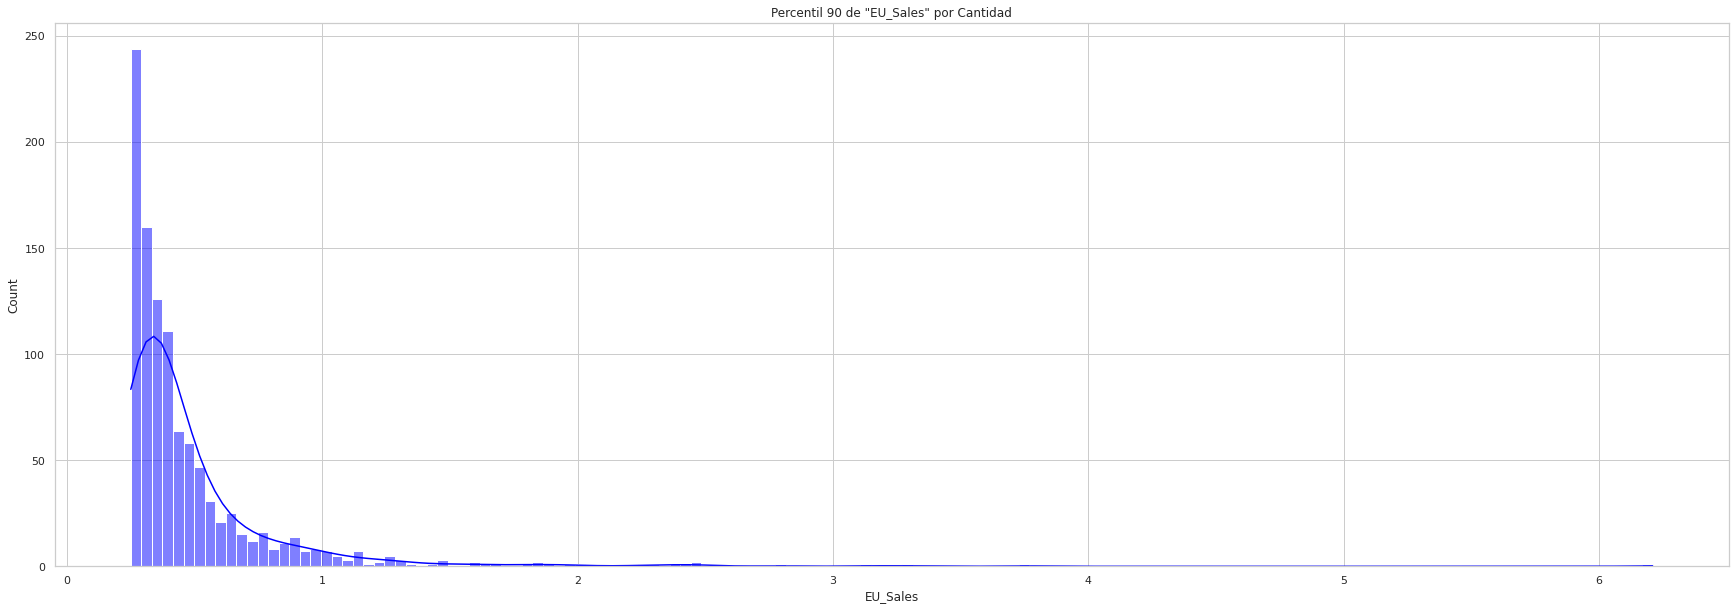

In [524]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['EU_Sales'],color='blue',kde=True).set(title='Percentil 90 de "EU_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [525]:
df = df[(df['EU_Sales'] >= p30) & (df['EU_Sales'] <= p90)]

In [526]:
df['NA_Sales'].describe()

count    7052.000000
mean        0.153364
std         0.127929
min         0.010000
25%         0.060000
50%         0.110000
75%         0.210000
max         0.610000
Name: NA_Sales, dtype: float64

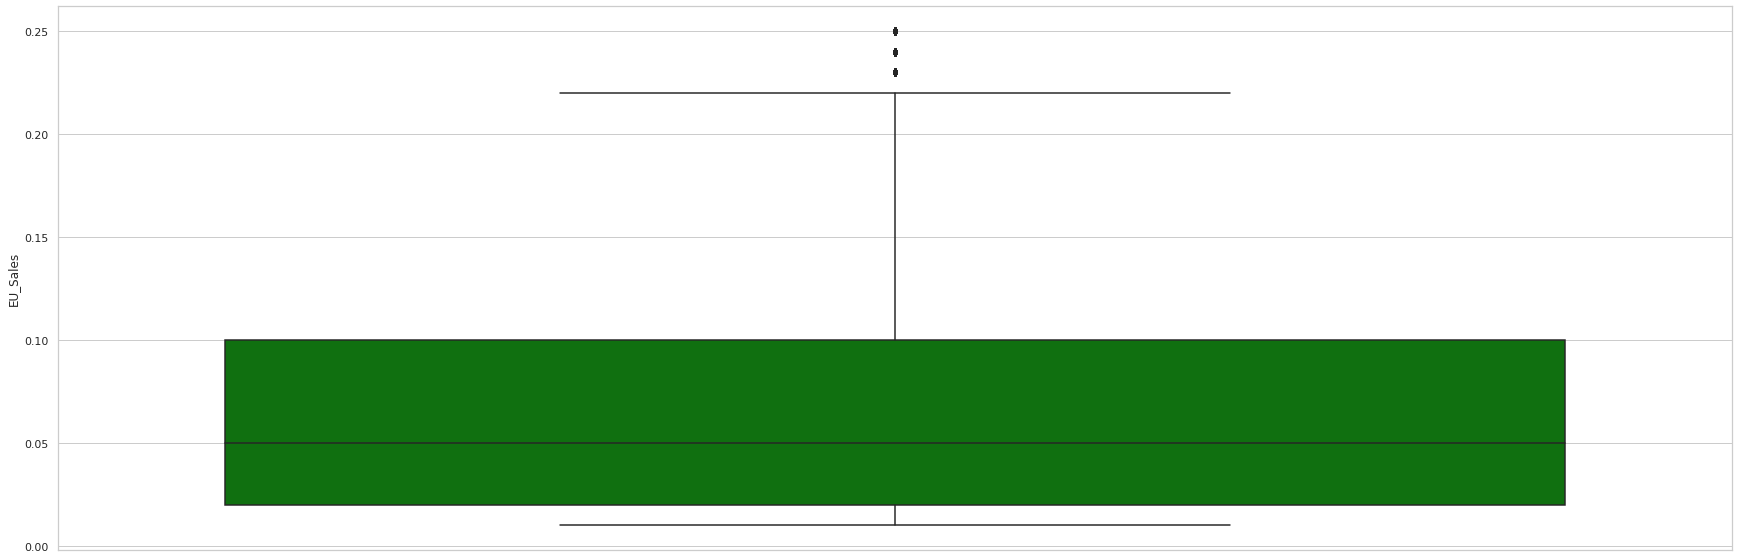

In [527]:
ax = sns.boxplot(y=df['EU_Sales'], data=df,color='green')

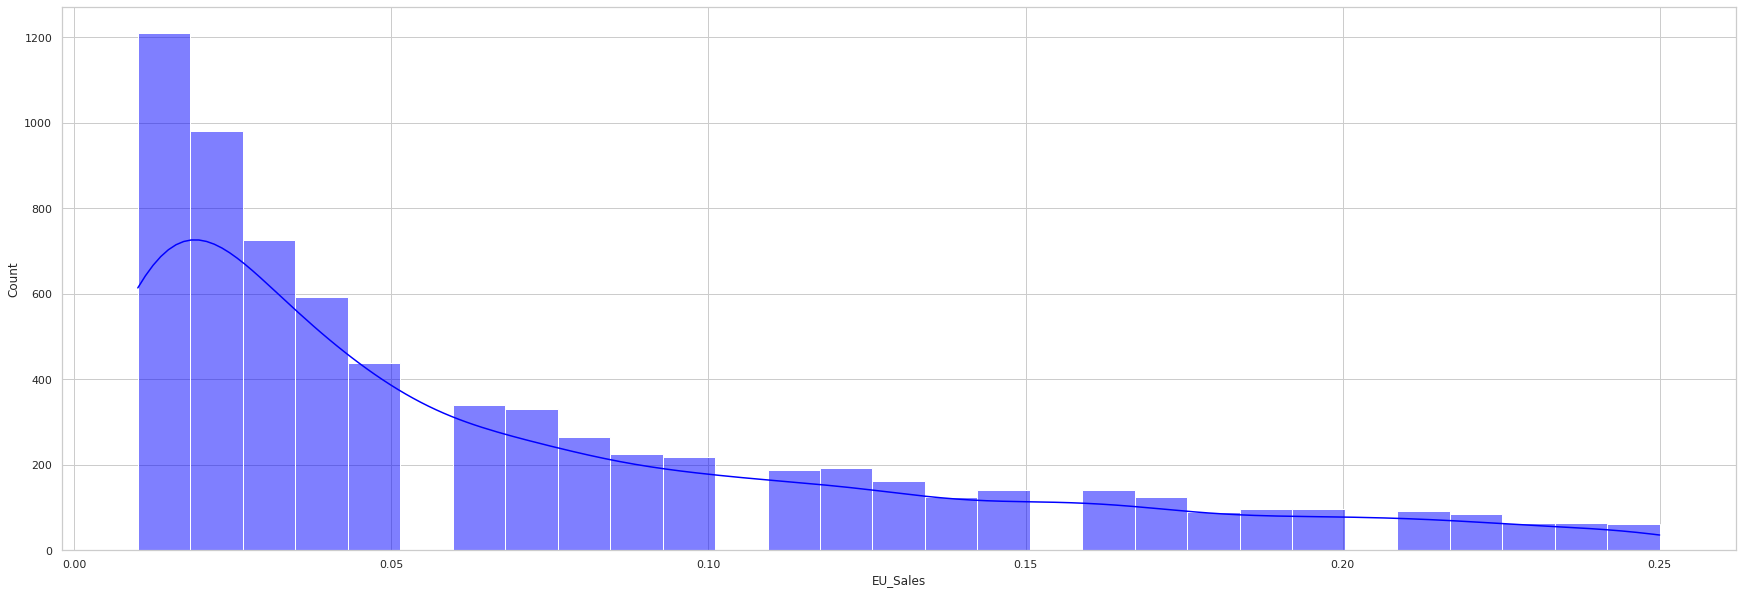

In [528]:
ax = sns.histplot(df['EU_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.


#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Japón:



Text(0, 0.5, 'Ventas en Japón')

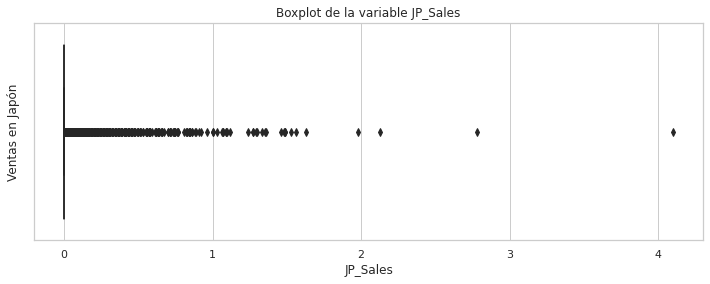

In [529]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="JP_Sales", data=df, color='green')
plt.title('Boxplot de la variable JP_Sales')
ax.set_ylabel('Ventas en Japón')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [530]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 90% y 99% e iremos cambiando para encontrar los outliers más distorsivos 
p90 = np.percentile(df['JP_Sales'], 90)
p99 = np.percentile(df['JP_Sales'], 99)

In [531]:
dfp90=df[(df['JP_Sales'] <= p90)]
dfp90['JP_Sales'].describe()

count    6381.000000
mean        0.002280
std         0.009109
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.060000
Name: JP_Sales, dtype: float64

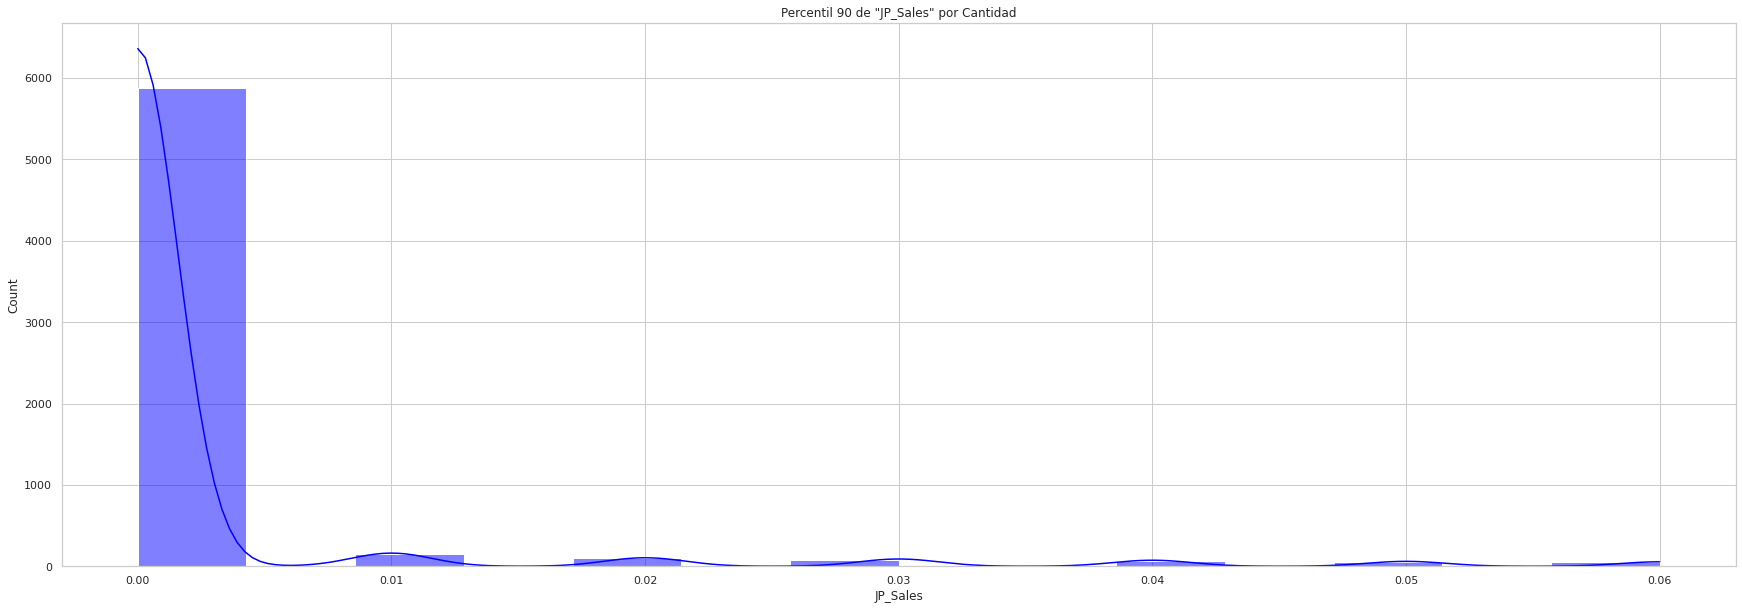

In [532]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['JP_Sales'], color='blue',kde=True).set(title='Percentil 90 de "JP_Sales" por Cantidad')
plt.show()

In [533]:
dfp99=df[(df['JP_Sales'] >= p99)]
dfp99['JP_Sales'].describe()

count    74.000000
mean      1.029595
std       0.536440
min       0.620000
25%       0.710000
50%       0.850000
75%       1.210000
max       4.100000
Name: JP_Sales, dtype: float64

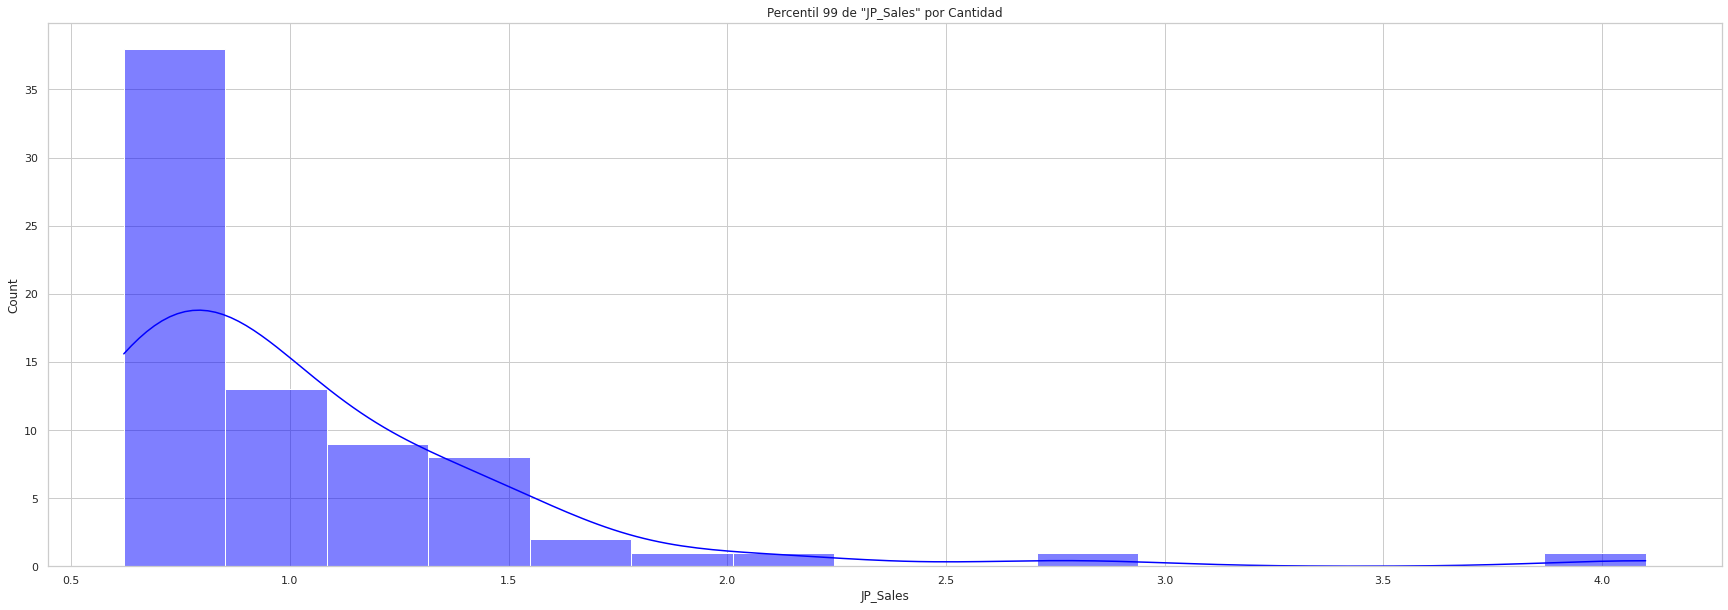

In [534]:
#Histograma de ventas del percentil 99
sns.histplot(dfp99['JP_Sales'],color='blue',kde=True).set(title='Percentil 99 de "JP_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [535]:
df = df[(df['JP_Sales'] >= p90) & (df['JP_Sales'] <= p99)]

In [536]:
df['JP_Sales'].describe()

count    653.000000
mean       0.193124
std        0.130652
min        0.060000
25%        0.090000
50%        0.150000
75%        0.260000
max        0.620000
Name: JP_Sales, dtype: float64

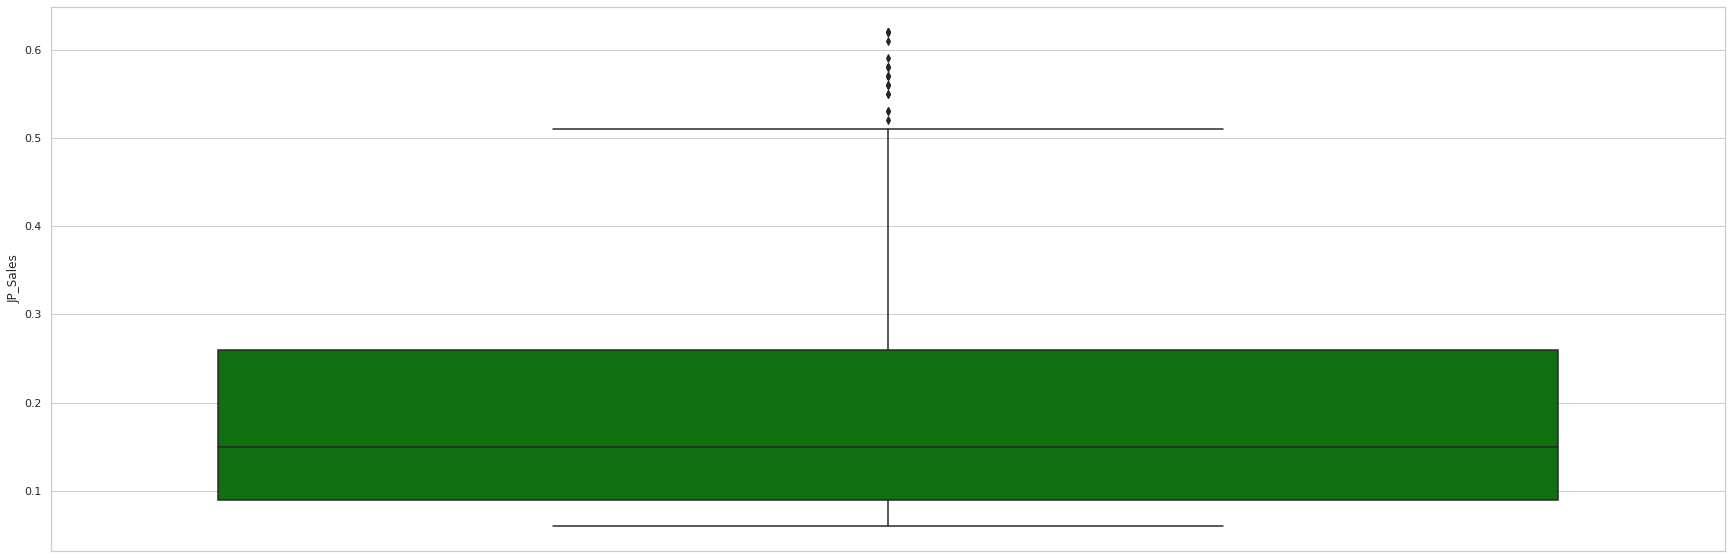

In [537]:
ax = sns.boxplot(y=df['JP_Sales'], data=df,color='green')

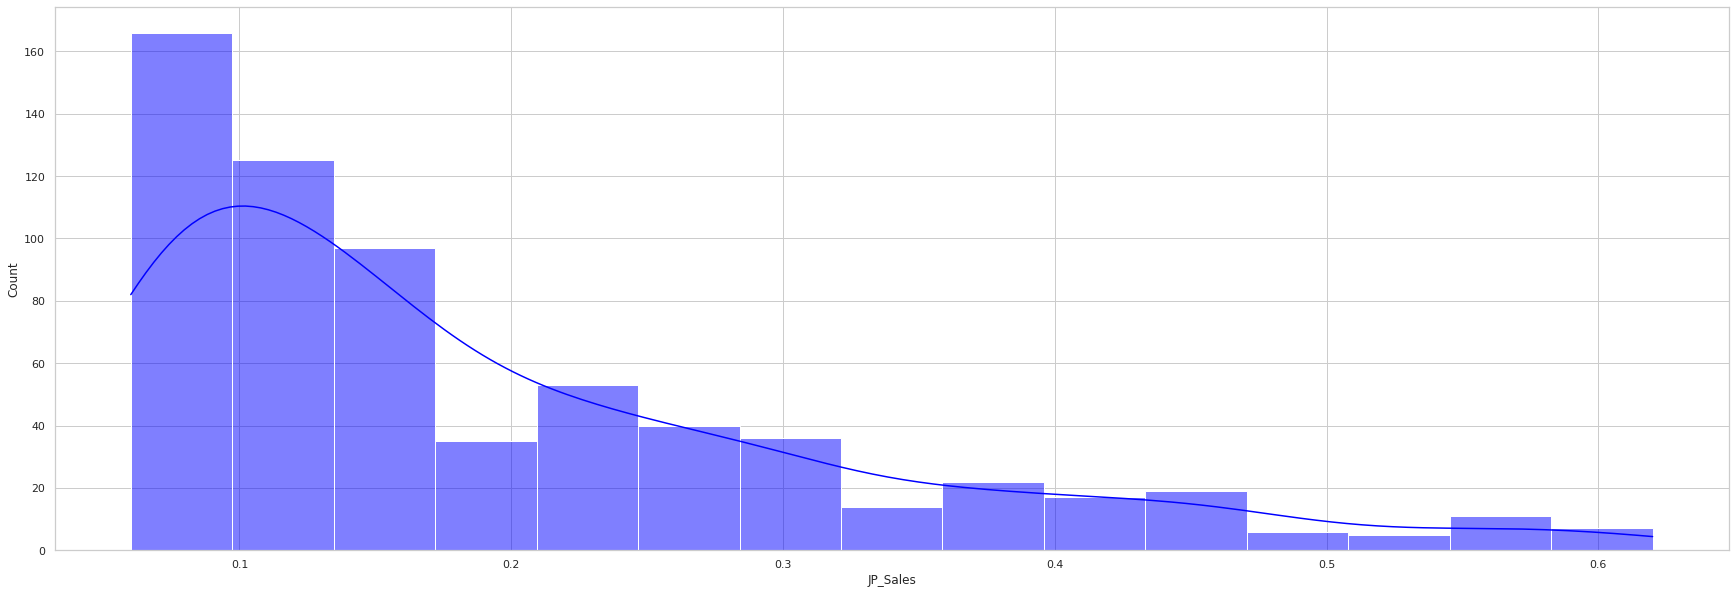

In [538]:
ax = sns.histplot(df['JP_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.


#####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos en Resto del Mundo:



Text(0, 0.5, 'Ventas en resto del mundo')

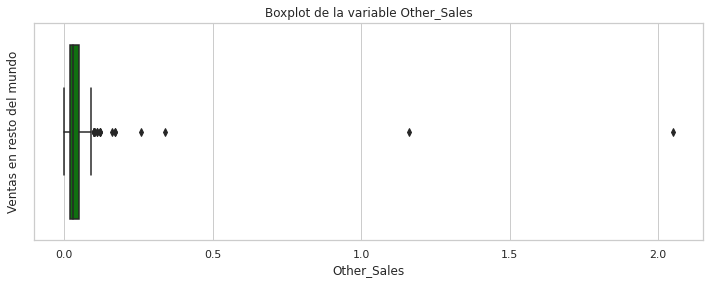

In [539]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="Other_Sales", data=df, color='green')
plt.title('Boxplot de la variable Other_Sales')
ax.set_ylabel('Ventas en resto del mundo')

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [540]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 10% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p10 = np.percentile(df['Other_Sales'], 10)
p90 = np.percentile(df['Other_Sales'], 90)

In [541]:
dfp10=df[(df['Other_Sales'] <= p10)]
dfp10['Other_Sales'].describe()

count    161.000000
mean       0.008882
std        0.003161
min        0.000000
25%        0.010000
50%        0.010000
75%        0.010000
max        0.010000
Name: Other_Sales, dtype: float64

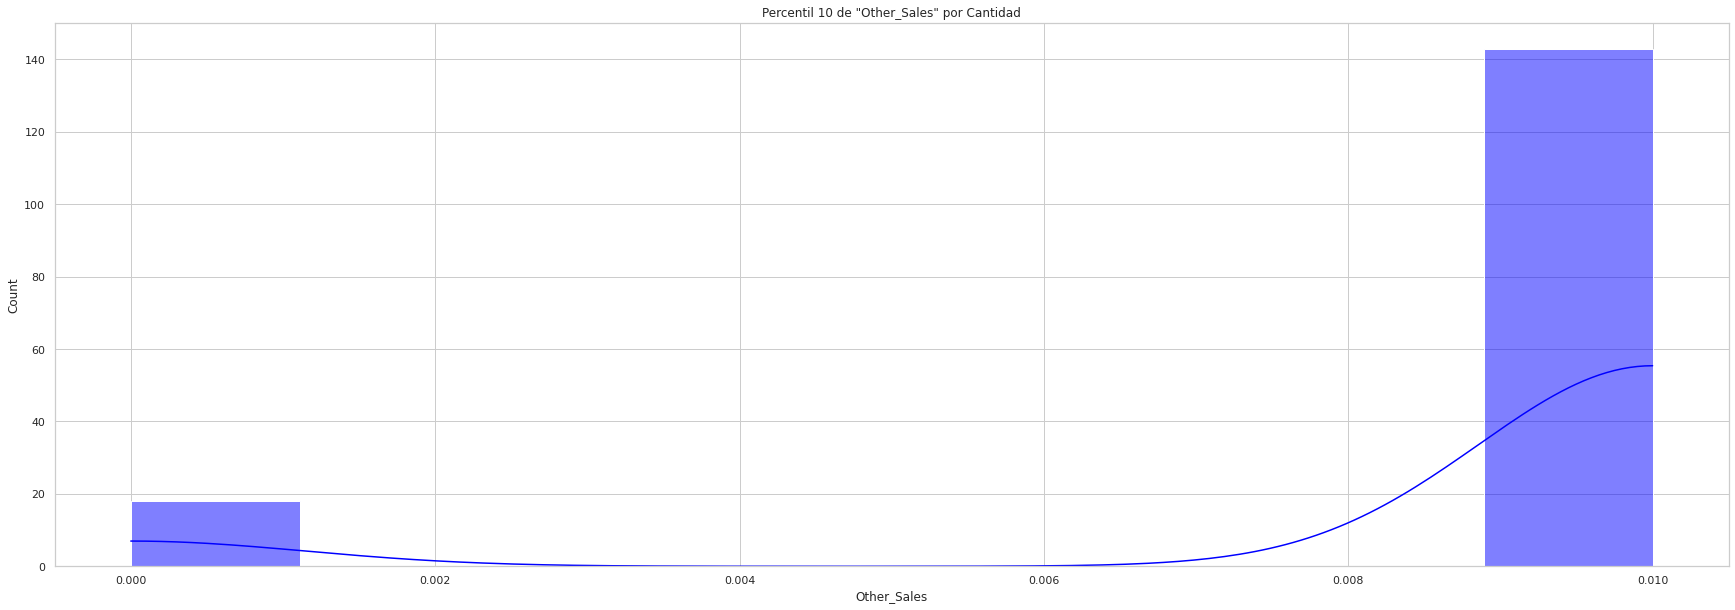

In [542]:
#Histograma de ventas del percentil 10
sns.histplot(dfp10['Other_Sales'], color='blue',kde=True).set(title='Percentil 10 de "Other_Sales" por Cantidad')
plt.show()

In [543]:
dfp90=df[(df['Other_Sales'] >= p90)]
dfp90['Other_Sales'].describe()

count    77.000000
mean      0.132338
std       0.255806
min       0.070000
25%       0.070000
50%       0.080000
75%       0.100000
max       2.050000
Name: Other_Sales, dtype: float64

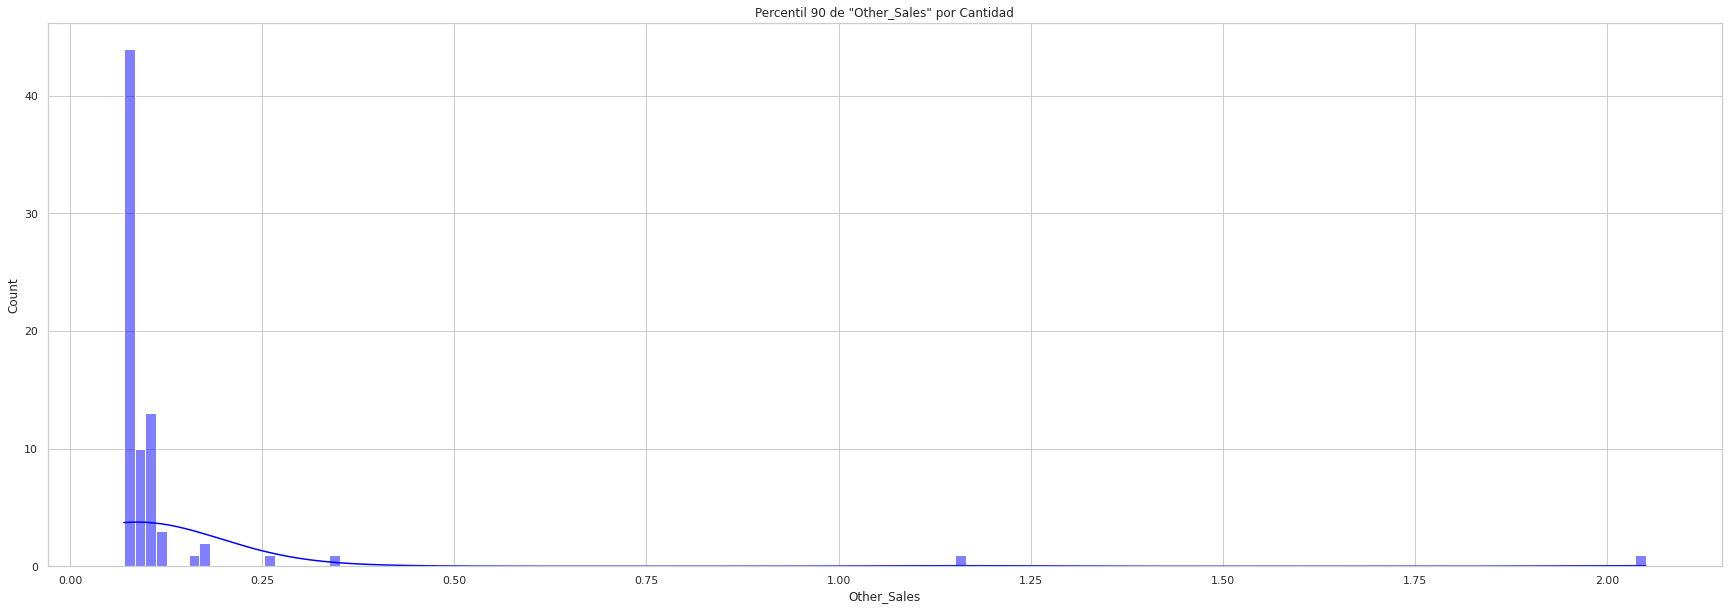

In [544]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['Other_Sales'],color='blue',kde=True).set(title='Percentil 90 de "Other_Sales" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [545]:
df = df[(df['Other_Sales'] >= p10) & (df['Other_Sales'] <= p90)]

In [546]:
df['Other_Sales'].describe()

count    580.000000
mean       0.029207
std        0.017207
min        0.010000
25%        0.020000
50%        0.030000
75%        0.040000
max        0.070000
Name: Other_Sales, dtype: float64

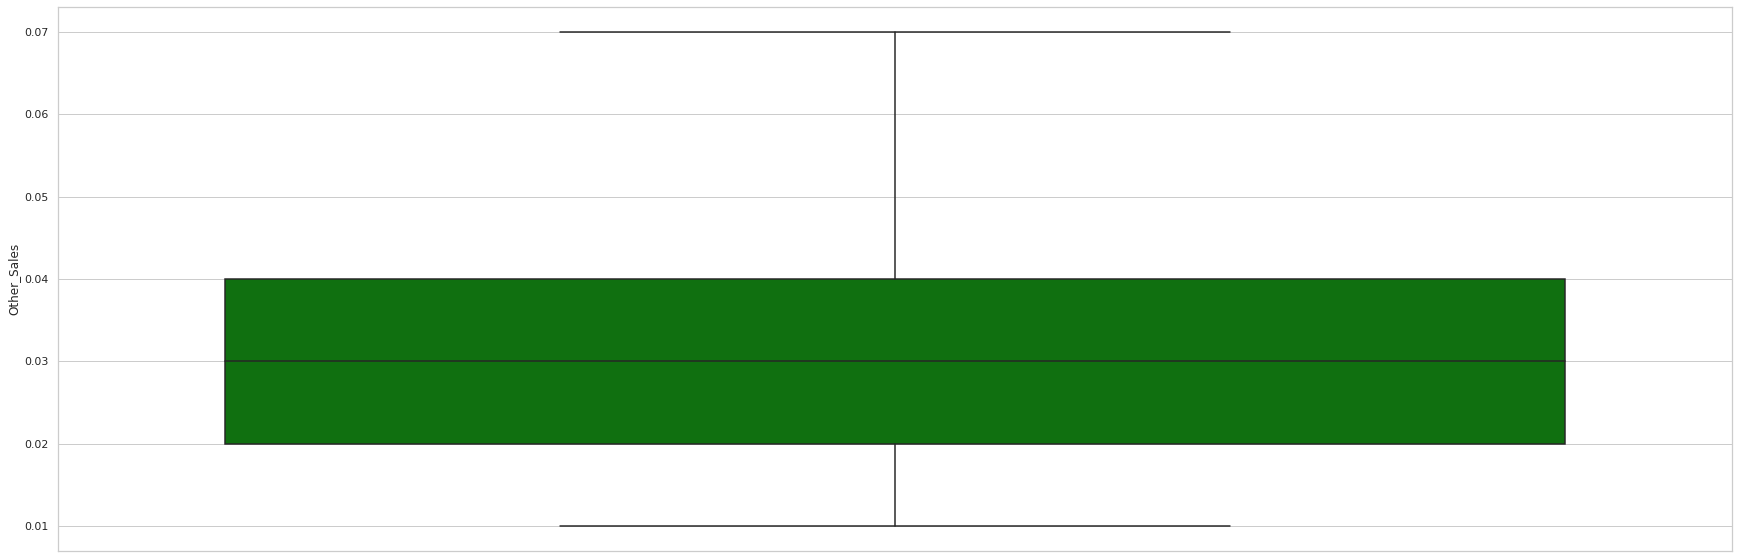

In [547]:
ax = sns.boxplot(y=df['Other_Sales'], data=df,color='green')

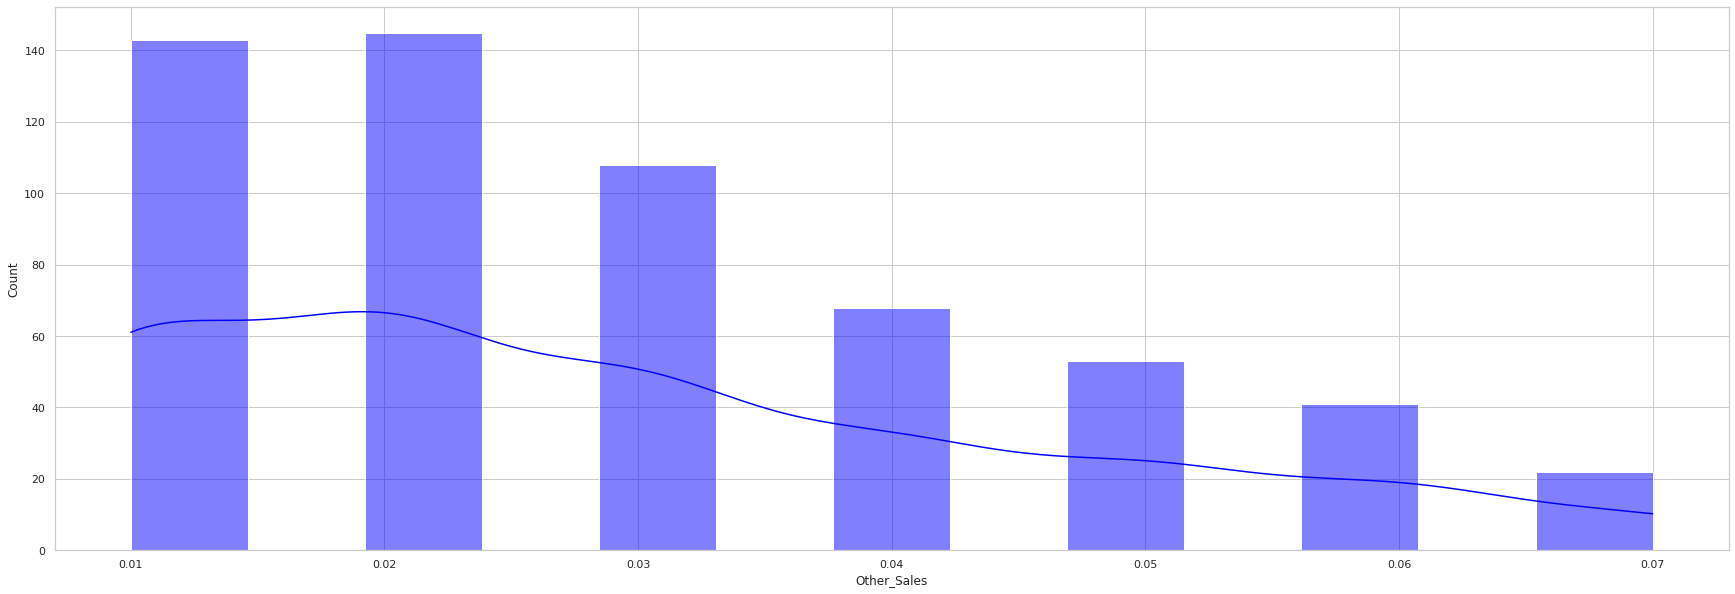

In [548]:
ax = sns.histplot(df['Other_Sales'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



Finalmente obtenemos el dataset con información relevante que utilizaremos para nuestro analisis.
Se puede apreciar una notable reducción de datos y características en comparación con el dataset original.

#####Analisis generalizado posterior a la eliminacion de Outliers.

Verificaremos como quedo el DataBase posterior a la eliminacion de los datos mas distorisivos.

In [549]:
df

Rank                                               Name Platform  \
1401    1403                                        Paper Mario      N64   
1481    1483                     Pokemon Ranger: Guardian Signs       DS   
1573    1575                                   Final Fantasy IV       DS   
1608    1610                        Tetris 2 (All region sales)       GB   
1623    1625                                        Castlevania      NES   
...      ...                                                ...      ...   
10112  10114                              Samurai Warriors 4-II      PS4   
10378  10380                                      Carnage Heart       PS   
10453  10455                                  Gallop Racer 2006      PS2   
10660  10662  Atelier Sophie: The Alchemist of the Mysteriou...      PS4   
10757  10759                                       Shadow Tower       PS   

       Year         Genre                     Publisher  NA_Sales  EU_Sales  \
1401   2000  Role-Playing                      Nintendo      0.58      0.18   
1481   2010  Role-Playing                      Nintendo      0.51      0.17   
1573   2007    Simulation                   Square Enix      0.54      0.05   
1608   1992        Puzzle                      Nintendo      0.56      0.22   
1623   1986      Platform  Konami Digital Entertainment      0.54      0.06   
...     ...           ...                           ...       ...       ...   
10112  2015        Action                    Tecmo Koei      0.03      0.02   
10378  1995      Strategy   Sony Computer Entertainment      0.01      0.01   
10453  2005        Sports                    Tecmo Koei      0.02      0.02   
10660  2015  Role-Playing                    Tecmo Koei      0.01      0.02   
10757  1998  Role-Playing                 From Software      0.01      0.01   

       JP_Sales  Other_Sales  Global_Sales  
1401       0.59         0.02          1.38  
1481       0.58         0.06          1.33  
1573       0.62         0.05          1.26  
1608       0.43         0.03          1.24  
1623       0.62         0.01          1.23  
...         ...          ...           ...  
10112      0.06         0.01          0.11  
10378      0.09         0.01          0.11  
10453      0.06         0.01          0.10  
10660      0.06         0.01          0.10  
10757      0.07         0.01          0.10  

[580 rows x 11 columns]

Podemos verificar que se redujeron en gran medida los datos que no cumplian con las condiciones marcadas anteriormente, finalmente nos quedamos con un total de 580 filas y 11 columnas. Posteriormente realizaremos un analisis con graficos generalizados para poder verificar el comportamiento del DataBase.

<ipython-input-550-d284d3114f8a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



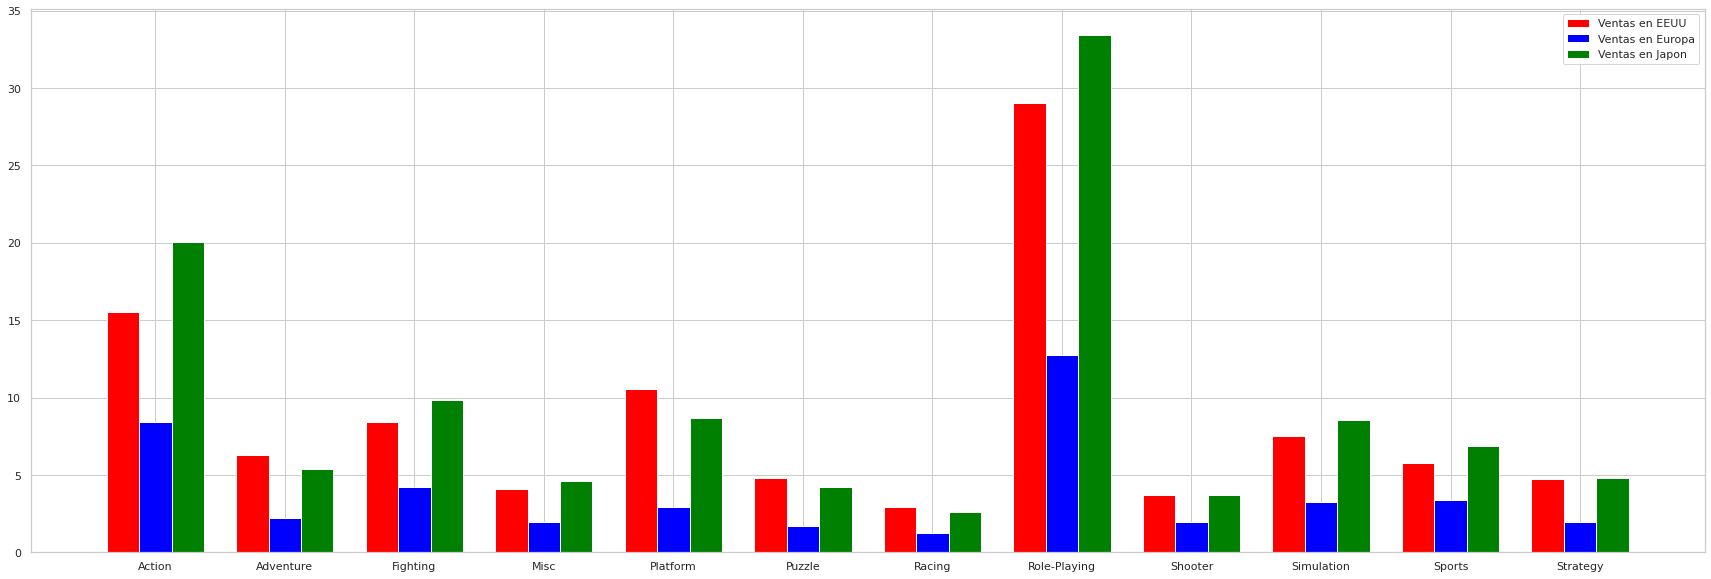

In [550]:
df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales',].sum()
n = len(df_new.index)
x = np.arange(n)
width = 0.25
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(x - width, df_new.NA_Sales, width=width, label='Ventas en EEUU', color = 'red')
plt.bar(x, df_new.EU_Sales, width=width, label='Ventas en Europa', color = 'blue')
plt.bar(x + width, df_new.JP_Sales, width=width, label='Ventas en Japon', color = 'green')
plt.xticks(x, df_new.index)
plt.legend(loc='best')
plt.show()

En las graficas brindadas podemos ver principalmente las apariciones de los generos mas cotizados donde lleva la delantera los juegos de tipo Role-Playing liderando con un fuerte recuento y posteriormente los juegos de accion.

Text(0.5, 0, 'Genero')

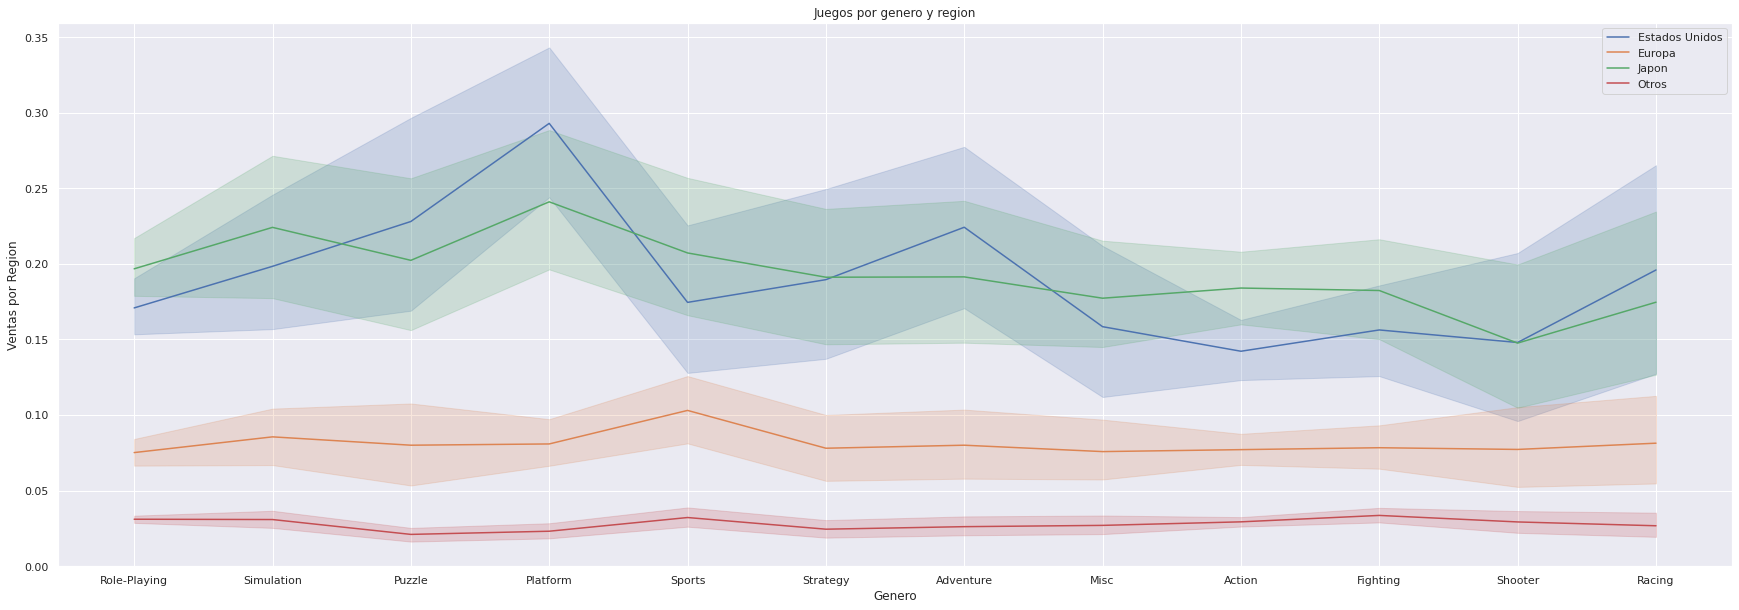

In [551]:
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df, x='Genre', y="NA_Sales")
sns.lineplot(data=df, x='Genre', y="EU_Sales")
sns.lineplot(data=df, x='Genre', y='JP_Sales')
sns.lineplot(data=df, x='Genre', y='Other_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon", "Otros"])
plt.title("Juegos por genero y region")
plt.ylabel("Ventas por Region")
plt.xlabel("Genero")

Esta visualizacion nos permite confirmar el comportamiento a nivel de consumo seccionado por genero segun la zona, para el mismo confirmamos que Japon y Norte America definen gustos similares en cuanto a catidad de generos consumidos como se meciono anteriormente.

Text(0.5, 0, 'Plataforma')

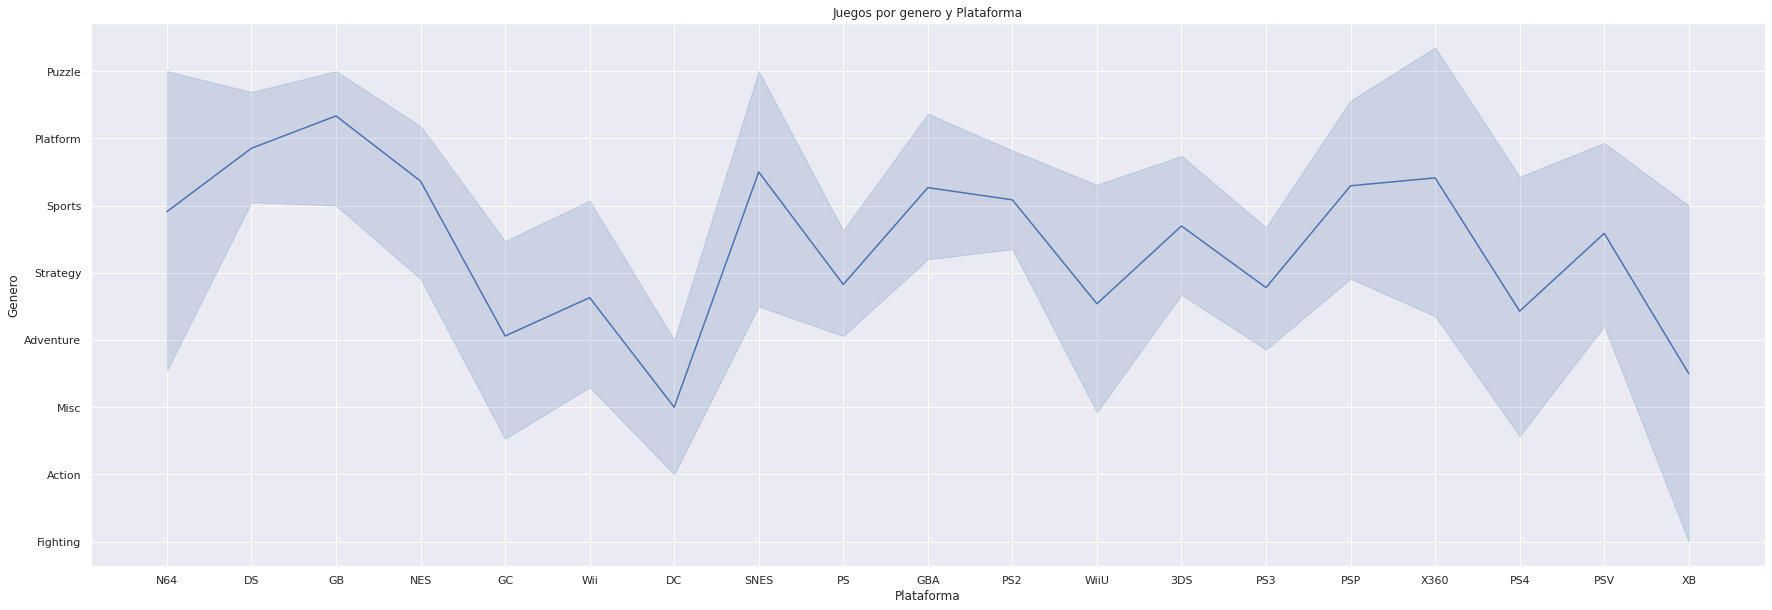

In [552]:
sns.lineplot(data=df, x='Platform', y="Genre")
sns.set(rc = {'figure.figsize':(30,10)})
plt.title("Juegos por genero y Plataforma")
plt.ylabel("Genero")
plt.xlabel("Plataforma")

Este grafico nos permite diferenciar el comportamiento entre las plataformas y los generos, esto nos permite identificar el como cada consola es centrada a un determinado enfoque de tipo de genero en cuanto al juego.

[]

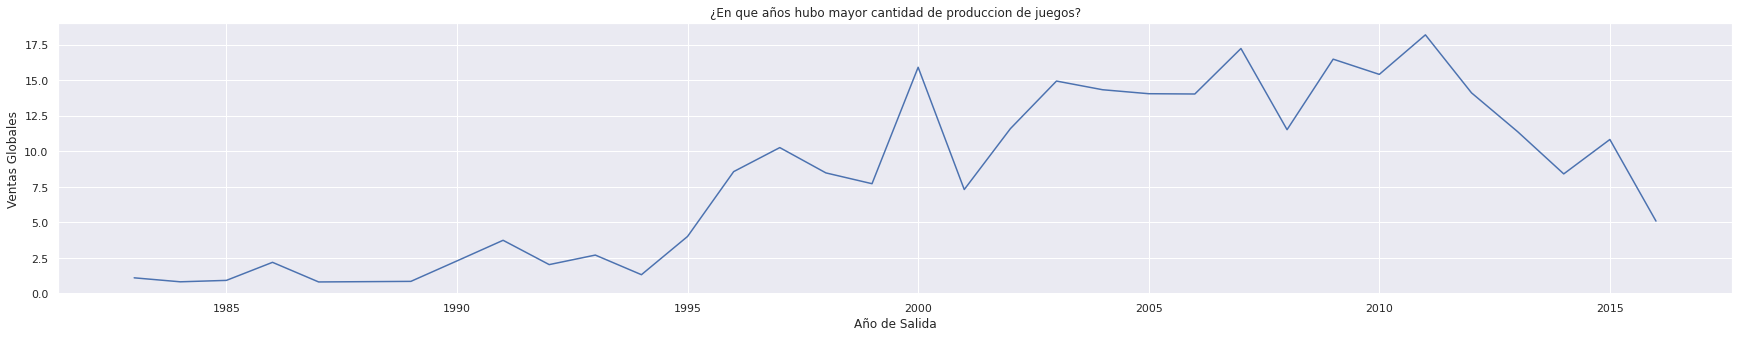

In [553]:
df_1 = df[['Global_Sales','Year']].groupby(by='Year').sum('Global_Sales')
df_1
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_1.index,df_1.Global_Sales)
ax.set_xlabel('Año de Salida')                  
ax.set_ylabel('Ventas Globales')
ax.set_title('¿En que años hubo mayor cantidad de produccion de juegos?')
plt.plot()

Esta visualizacion nos permite ver el comportamiento de la cantidad de lanzamientos que se registraron por año, viendo las grandes confluencias con los mayores parametros entre los años 2000 y 2010 para posteriormente pasar a una tendencia bajista posterior al 2010.

In [554]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 
                             'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()
fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales",line_shape='vh' )
fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales",line_shape='vh')
fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales",line_shape='vh')
fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other Sales",line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]
layout = dict(title = 'Cantidad de Ventas totales por año segun su zona.',
              xaxis= dict(title= 'Año' ), yaxis= dict(title= 'Total de ventas en millones',))

figure = dict(data = figs, layout = layout)
iplot(figure)

Esta visualizacion nos permite verificar de manera mas detallada el comportamiento diferenciado por zona segun la cantidad de ventas, donde verificamos un comportamiento bastante similar entre Japon y Norte America donde en ciertos periodos uno supera al otro en cantidad de ventas.

# **Feature Engineering.**

## ***Encoding.***

### ***Seleccion de Feature y Entrenamiento.***

In [555]:
df

Rank                                               Name Platform  \
1401    1403                                        Paper Mario      N64   
1481    1483                     Pokemon Ranger: Guardian Signs       DS   
1573    1575                                   Final Fantasy IV       DS   
1608    1610                        Tetris 2 (All region sales)       GB   
1623    1625                                        Castlevania      NES   
...      ...                                                ...      ...   
10112  10114                              Samurai Warriors 4-II      PS4   
10378  10380                                      Carnage Heart       PS   
10453  10455                                  Gallop Racer 2006      PS2   
10660  10662  Atelier Sophie: The Alchemist of the Mysteriou...      PS4   
10757  10759                                       Shadow Tower       PS   

       Year         Genre                     Publisher  NA_Sales  EU_Sales  \
1401   2000  Role-Playing                      Nintendo      0.58      0.18   
1481   2010  Role-Playing                      Nintendo      0.51      0.17   
1573   2007    Simulation                   Square Enix      0.54      0.05   
1608   1992        Puzzle                      Nintendo      0.56      0.22   
1623   1986      Platform  Konami Digital Entertainment      0.54      0.06   
...     ...           ...                           ...       ...       ...   
10112  2015        Action                    Tecmo Koei      0.03      0.02   
10378  1995      Strategy   Sony Computer Entertainment      0.01      0.01   
10453  2005        Sports                    Tecmo Koei      0.02      0.02   
10660  2015  Role-Playing                    Tecmo Koei      0.01      0.02   
10757  1998  Role-Playing                 From Software      0.01      0.01   

       JP_Sales  Other_Sales  Global_Sales  
1401       0.59         0.02          1.38  
1481       0.58         0.06          1.33  
1573       0.62         0.05          1.26  
1608       0.43         0.03          1.24  
1623       0.62         0.01          1.23  
...         ...          ...           ...  
10112      0.06         0.01          0.11  
10378      0.09         0.01          0.11  
10453      0.06         0.01          0.10  
10660      0.06         0.01          0.10  
10757      0.07         0.01          0.10  

[580 rows x 11 columns]

Segun Visualizaciones previas podemos corroborar que el Genero Role-Playing es el mas solicitado en todo el mercado, por ende centraremos las siguientes tecnicas de entrenamiento de modelo de machine learning en dicho genero.

In [556]:
Role_Playing_df = df[df['Genre']=='Role-Playing']
Role_Playing_df

Rank                                               Name Platform  \
1401    1403                                        Paper Mario      N64   
1481    1483                     Pokemon Ranger: Guardian Signs       DS   
1866    1868                                 Tales of Symphonia       GC   
1986    1988                                   Pokemon Conquest       DS   
2056    2058                                 Breath of Fire III       PS   
...      ...                                                ...      ...   
8872    8874                           Odin Sphere: Leifthrasir      PSV   
9637    9639                  Operation Abyss: New Tokyo Legacy      PSV   
9944    9946                                Makai Shin Trillion      PSV   
10660  10662  Atelier Sophie: The Alchemist of the Mysteriou...      PS4   
10757  10759                                       Shadow Tower       PS   

       Year         Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
1401   2000  Role-Playing              Nintendo      0.58      0.18      0.59   
1481   2010  Role-Playing              Nintendo      0.51      0.17      0.58   
1866   2003  Role-Playing              Nintendo      0.54      0.21      0.31   
1986   2012  Role-Playing              Nintendo      0.58      0.06      0.37   
2056   1997  Role-Playing                Capcom      0.29      0.19      0.46   
...     ...           ...                   ...       ...       ...       ...   
8872   2016  Role-Playing  Nippon Ichi Software      0.02      0.03      0.08   
9637   2014  Role-Playing  Nippon Ichi Software      0.04      0.01      0.06   
9944   2014  Role-Playing          Idea Factory      0.02      0.02      0.06   
10660  2015  Role-Playing            Tecmo Koei      0.01      0.02      0.06   
10757  1998  Role-Playing         From Software      0.01      0.01      0.07   

       Other_Sales  Global_Sales  
1401          0.02          1.38  
1481          0.06          1.33  
1866          0.04          1.10  
1986          0.04          1.05  
2056          0.07          1.00  
...            ...           ...  
8872          0.02          0.15  
9637          0.02          0.13  
9944          0.01          0.12  
10660         0.01          0.10  
10757         0.01          0.10  

[170 rows x 11 columns]

In [557]:
Role_Playing_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [558]:
Role_Playing_df = Role_Playing_df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
Role_Playing_df = Role_Playing_df.set_index('Year', drop=True)
Role_Playing_df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2000      0.58      0.18      0.59         0.02          1.38
2010      0.51      0.17      0.58         0.06          1.33
2003      0.54      0.21      0.31         0.04          1.10
2012      0.58      0.06      0.37         0.04          1.05
1997      0.29      0.19      0.46         0.07          1.00
...        ...       ...       ...          ...           ...
2016      0.02      0.03      0.08         0.02          0.15
2014      0.04      0.01      0.06         0.02          0.13
2014      0.02      0.02      0.06         0.01          0.12
2015      0.01      0.02      0.06         0.01          0.10
1998      0.01      0.01      0.07         0.01          0.10

[170 rows x 5 columns]

Corroboramos que no haya nulos y segmentamos las columnas por ventas referenciado por año. Ya tenemos el conjunto completo de datos, antes de visualizar el modelo segun los datos corroboramos si hay una secuencia de ventas para identificar un patron.

In [559]:
df = df.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()

<ipython-input-559-fb92af14beac>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [560]:
df = df.iloc[:-2]
df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
1983  0.510000  0.120000  0.450000     0.020000      1.100000
1984  0.420000  0.100000  0.280000     0.020000      0.820000
1985  0.390000  0.090000  0.430000     0.010000      0.920000
1986  0.430000  0.060000  0.595000     0.010000      1.095000
1987  0.450000  0.080000  0.270000     0.010000      0.810000
1989  0.400000  0.070000  0.370000     0.010000      0.850000
1990  0.485000  0.185000  0.445000     0.025000      1.145000
1991  0.435000  0.095000  0.390000     0.015000      0.935000
1992  0.475000  0.145000  0.375000     0.020000      1.015000
1993  0.413333  0.090000  0.383333     0.013333      0.900000
1994  0.143333  0.100000  0.170000     0.030000      0.440000
1995  0.078182  0.051818  0.212727     0.023636      0.364545
1996  0.104000  0.063000  0.237500     0.025500      0.428500
1997  0.155238  0.083333  0.218571     0.033810      0.488571
1998  0.111500  0.062500  0.220000     0.026500      0.424000
1999  0.175714  0.087143  0.255000     0.033571      0.551429
2000  0.214000  0.130800  0.256000     0.038400      0.636400
2001  0.155882  0.090000  0.160000     0.024706      0.430000
2002  0.149200  0.093200  0.193200     0.029200      0.463600
2003  0.242083  0.102500  0.255000     0.025000      0.622500
2004  0.233077  0.088846  0.211538     0.018462      0.551154
2005  0.195862  0.062069  0.206207     0.021379      0.484483
2006  0.180625  0.050000  0.181562     0.028125      0.438438
2007  0.254688  0.048750  0.202500     0.031875      0.538438
2008  0.193077  0.065769  0.154615     0.028846      0.443077
2009  0.194412  0.081176  0.176471     0.032647      0.484706
2010  0.189697  0.066970  0.179394     0.031818      0.466970
2011  0.165122  0.093415  0.149512     0.034634      0.443659
2012  0.184667  0.078333  0.174333     0.031667      0.470333
2013  0.123103  0.070000  0.169655     0.031034      0.392414
2014  0.091071  0.062143  0.120357     0.030000      0.300357

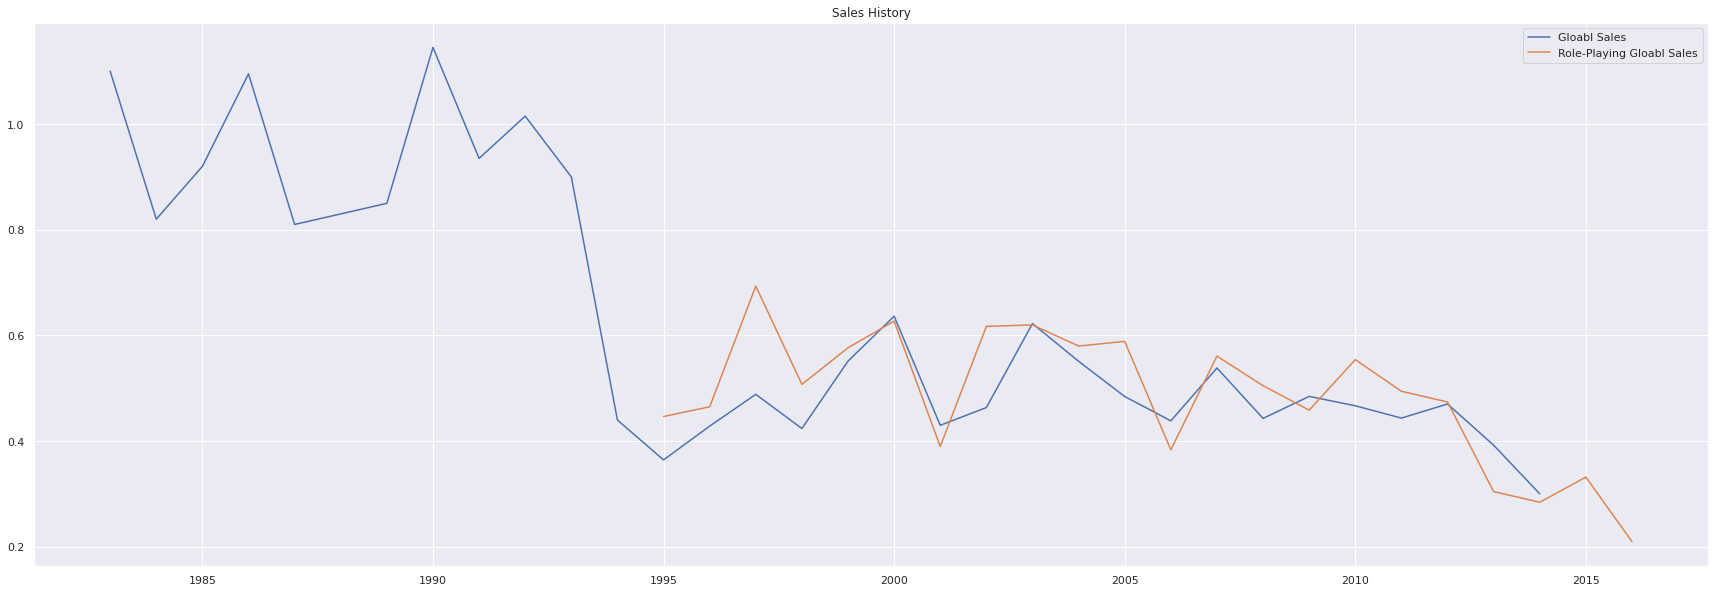

In [561]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Gloabl Sales')
plt.plot(Role_Playing_df.groupby('Year')['Global_Sales'].mean(), label='Role-Playing Gloabl Sales')
plt.legend()
plt.title('Sales History')
plt.show()

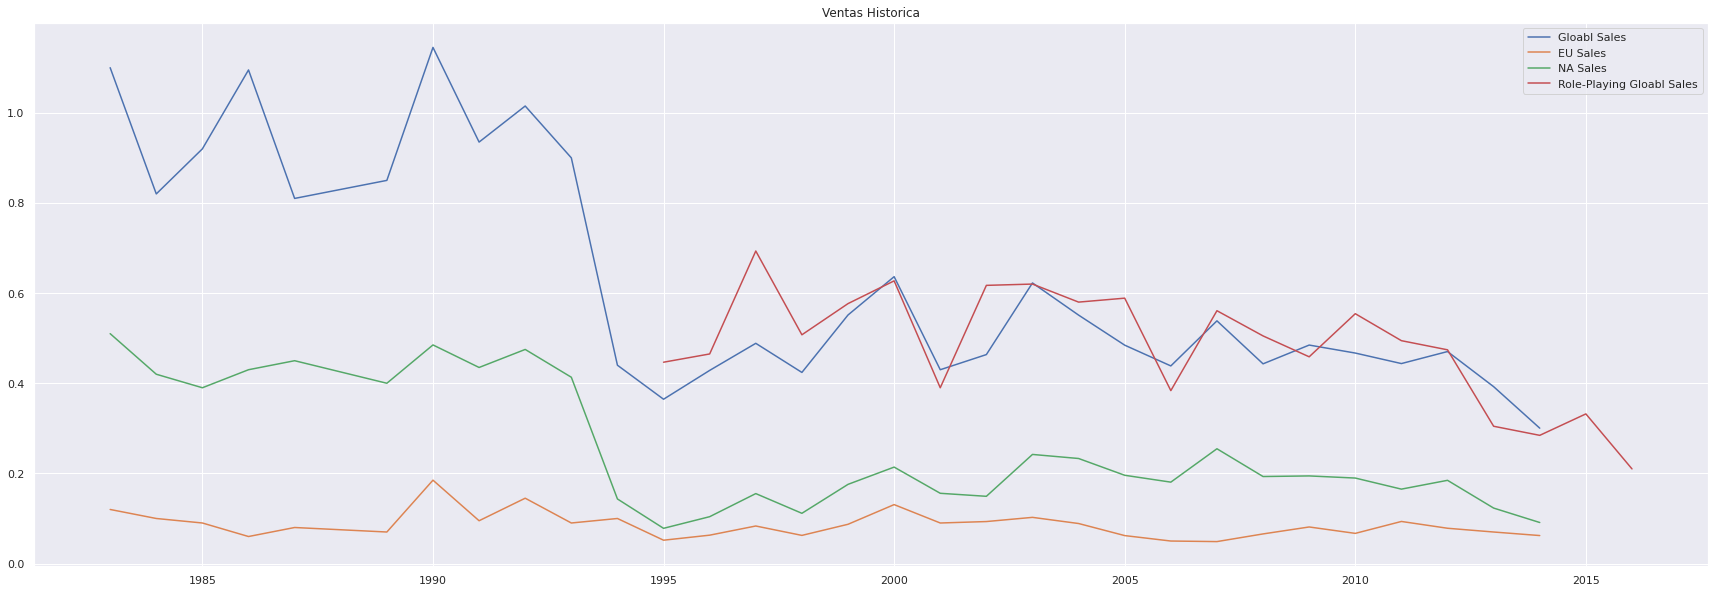

In [563]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Gloabl Sales')
plt.plot(df.groupby('Year')['EU_Sales'].mean(), label='EU Sales')
plt.plot(df.groupby('Year')['NA_Sales'].mean(), label='NA Sales')
plt.plot(Role_Playing_df.groupby('Year')['Global_Sales'].mean(), label='Role-Playing Gloabl Sales')
plt.legend()
plt.title('Ventas Historica')
plt.show()

A nivel mundial la venta de videojuegos de rol es ligeramente superior y similar a partir de su aparicion a comparacion de la media global historica, en general.

In [564]:
Role_Playing_df.corr()['Global_Sales']

NA_Sales        0.781380
EU_Sales        0.665493
JP_Sales        0.703806
Other_Sales     0.673851
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

Verificamos la correlacion del genero Role-Playing donde efectivamente tiene una alta correlacion con las ventas globales, posteriormente con Norteamerica, Japon y por ultimo Europay el restante. Tomaremos a las ventas Globales y a la ventas en Norte america para poder predecir.

In [565]:
Role_Playing_ds = Role_Playing_df[['NA_Sales', 'Global_Sales']].sort_index()
Role_Playing_ds

NA_Sales  Global_Sales
Year                        
1995      0.02          0.17
1995      0.21          0.60
1995      0.11          0.57
1996      0.14          0.45
1996      0.06          0.20
...        ...           ...
2015      0.01          0.10
2015      0.09          0.23
2016      0.06          0.18
2016      0.06          0.30
2016      0.02          0.15

[170 rows x 2 columns]

In [566]:
Role_Playing_v = Role_Playing_ds.values
Role_Playing_v.shape

(170, 2)

In [570]:
x_data = []
y_data = []
for i in range(len(Role_Playing_v)):
    #print(i)
    if i <= len(Role_Playing_v):
        x = Role_Playing_v[i][:1]
        y = Role_Playing_v[i][1]
        x_data.append(x)
        y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((170, 1), (170,))

In [572]:
Role_Playing_v[0], x_data[0]

(array([0.02, 0.17]), array([0.02]))

In [574]:
Role_Playing_v[0][:1]==x_data[0], Role_Playing_v[0][1] == y_data[0]

(array([ True]), True)

In [576]:
#Tomaremos el 90% de los datos para el entrenamiento.
train_test_split = 153

x_train = x_data[:train_test_split]
y_train = y_data[:train_test_split]

x_val = x_data[train_test_split:]
y_val = y_data[train_test_split:]

In [577]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((153, 1), (153,), (17, 1), (17,))

### ***Modelado-Prediccion.***

In [578]:
#Escala de datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
val_scaled = scaler.transform(x_val)

In [579]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
clf =  LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.28540860190785344

A modo de conclusion me esta dando un numero muy bajo, esto significa que basarse del genero mas cotizado no es un buen parametro predictivo. Estaremos analizando lo realizado previamente y relizar un re-ajuste para ver si se modifica los valores.